#Instalacja i import potrzebnych pakietów

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-tda
!pip install Ripser
!pip install persim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp38-cp38-linux_x86_64.whl size=458206 sha256=51da69e44faa7887ee4f254bbd22ee6fdb594918ed968e76fec590f8d63cb989
  Stored in directory: /root/.cache/pip/wheels/2a/91/ce/d7deed9ae6fb975821947c9aaa86134c95d2fe3f4b0f89b59e
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18119 sha256=5b976f26311726eea26ee935b098efa9af70a6ddb0e436fbac53f356598884e8
  Stored in directory: /root/.cache/pip/wheels/fb/

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ripser
import persim
import scipy.cluster.hierarchy as shc

In [4]:
from sklearn import datasets
from ripser import ripser
from persim import plot_diagrams
from ripser import Rips
from sklearn.preprocessing import MinMaxScaler

In [5]:
allteams = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/AllTeams.csv')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#dobrany zestaw styatystyk brany pod uwage w tej analizie
zestaw2 = ['Goals','Shots','OnTarShots','Assists','AccPasses','KeyPasses','CleanSheets']

#Analiza dla poszczególnych drużyn

##MCI - Manchester City - 1

In [8]:
mci = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/MCI.csv')
mci

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Ederson Moraes,1,12,37,37,3330,0,0,0,0,0,0,852,0,1,4,3,0,1,2,20,60
1,2,Joao Cancelo,2,12,36,36,3228,1,81,23,0,56,7,2510,39,34,26,7,0,113,83,19,0
2,3,Rodri,3,12,33,33,2887,7,45,14,0,12,2,2629,29,43,20,5,0,70,72,17,0
3,4,Bernardo Silva,3,12,35,33,2859,8,47,20,0,53,4,1692,59,30,33,6,0,49,57,16,0
4,5,Aymeric Laporte,2,12,33,33,2834,4,35,8,0,6,0,2767,9,14,10,5,1,35,33,18,0
5,6,Ruben Dias,2,12,29,27,2403,2,18,3,0,2,4,2115,15,27,9,5,0,42,26,14,0
6,7,K. De Bruyne,3,12,30,25,2205,15,77,31,0,31,8,1121,87,21,27,2,0,22,32,13,0
7,8,P. Foden,3,12,28,24,2133,9,57,22,0,37,5,839,40,15,23,1,0,19,16,13,0
8,9,R. Sterling,4,12,30,23,2127,13,57,28,2,53,5,700,42,19,37,1,0,21,23,12,0
9,10,J. Grealish,3,12,26,22,1917,3,45,16,0,40,3,819,52,17,55,3,0,25,18,13,0


In [9]:
features_names = mci.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [10]:
scaler = MinMaxScaler()
mci[features_names] = scaler.fit_transform(mci[features_names])
mci

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Ederson Moraes,1,12,1.000000,1.00,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.105140,0.000000,0.000000,0.000000,0.428571,0.0,0.000000,0.000000,1.000000,1.0
1,2,Joao Cancelo,2,12,0.956522,0.96,0.953888,0.066667,1.000000,0.741935,0.00,1.000000,0.875,0.879907,0.448276,0.785714,0.431373,1.000000,0.0,1.000000,1.000000,0.923077,0.0
2,3,Rodri,3,12,0.826087,0.84,0.799729,0.466667,0.555556,0.451613,0.00,0.214286,0.250,0.935514,0.333333,1.000000,0.313725,0.714286,0.0,0.616071,0.864198,0.769231,0.0
3,4,Bernardo Silva,3,12,0.913043,0.84,0.787071,0.533333,0.580247,0.645161,0.00,0.946429,0.500,0.497664,0.678161,0.690476,0.568627,0.857143,0.0,0.428571,0.679012,0.692308,0.0
4,5,Aymeric Laporte,2,12,0.826087,0.84,0.775769,0.266667,0.432099,0.258065,0.00,0.107143,0.000,1.000000,0.103448,0.309524,0.117647,0.714286,1.0,0.303571,0.382716,0.846154,0.0
5,6,Ruben Dias,2,12,0.652174,0.60,0.580922,0.133333,0.222222,0.096774,0.00,0.035714,0.500,0.695327,0.172414,0.619048,0.098039,0.714286,0.0,0.366071,0.296296,0.538462,0.0
6,7,K. De Bruyne,3,12,0.695652,0.52,0.491410,1.000000,0.950617,1.000000,0.00,0.553571,1.000,0.230841,1.000000,0.476190,0.450980,0.285714,0.0,0.187500,0.370370,0.461538,0.0
7,8,P. Foden,3,12,0.608696,0.48,0.458861,0.600000,0.703704,0.709677,0.00,0.660714,0.625,0.099065,0.459770,0.333333,0.372549,0.142857,0.0,0.160714,0.172840,0.461538,0.0
8,9,R. Sterling,4,12,0.695652,0.44,0.456148,0.866667,0.703704,0.903226,0.50,0.946429,0.625,0.034112,0.482759,0.428571,0.647059,0.142857,0.0,0.178571,0.259259,0.384615,0.0
9,10,J. Grealish,3,12,0.521739,0.40,0.361212,0.200000,0.555556,0.516129,0.00,0.714286,0.375,0.089720,0.597701,0.380952,1.000000,0.428571,0.0,0.214286,0.197531,0.461538,0.0


In [11]:
arrayPointsMCI = np.array(mci[zestaw2])
#arrayPoints

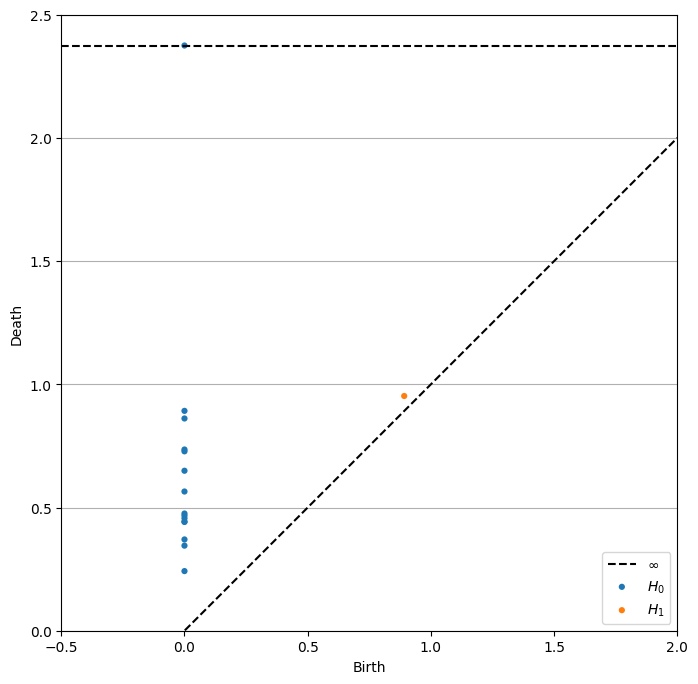

In [144]:
dgMCI = ripser(arrayPointsMCI)['dgms']
plt.grid(axis='y')
plot_diagrams(dgMCI, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

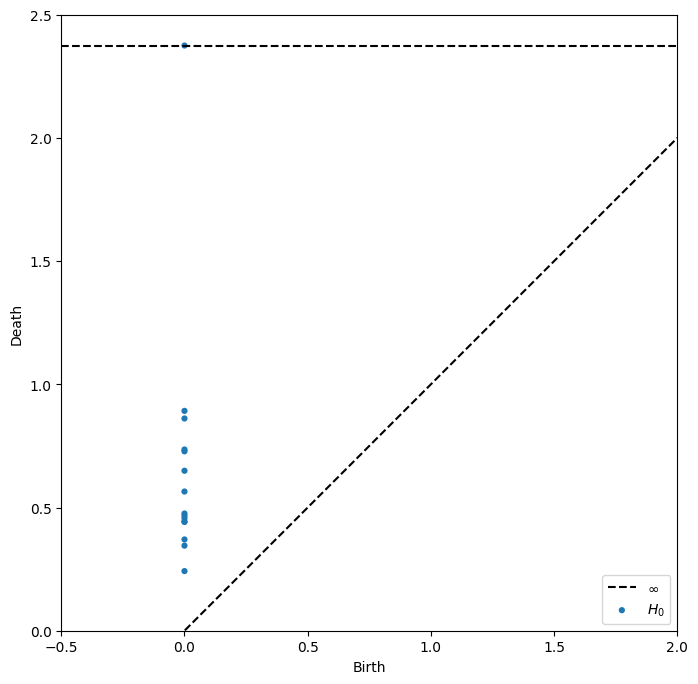

In [13]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgMCI_H0 = ripser(arrayPointsMCI)['dgms'][0]
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgMCI_H0, show=True, xy_range=[-0.5,2,0,2.5])

## LIV - Liverpool - 2

In [14]:
liv = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/LIV.csv') 
liv

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Alisson,1,11,36,36,3240,0,0,0,0,1,1,1005,1,0,2,0,0,1,3,20,76
1,2,V. van Dijk,2,11,34,34,3060,3,35,14,0,6,1,2369,9,9,8,3,0,41,16,21,0
2,3,T. Alexander-Arnold,2,11,32,32,2853,2,51,15,0,19,12,1683,90,12,7,2,0,66,40,18,0
3,4,S. Mane,4,11,34,32,2824,16,98,39,0,47,2,801,41,50,50,5,0,28,33,17,0
4,5,J. Matip,2,11,31,31,2790,3,35,9,0,9,3,2052,12,13,11,2,0,78,47,17,0
5,6,Mohamed Salah,4,11,35,30,2761,23,139,60,5,53,13,862,63,12,23,1,0,14,17,17,0
6,7,J. Henderson,3,11,35,29,2603,2,31,6,0,16,5,1844,38,23,7,3,0,43,36,14,0
7,8,A. Robertson,2,11,29,29,2541,3,18,8,0,13,10,1642,55,19,9,5,1,44,36,17,0
8,9,Diogo Jota,4,11,35,27,2372,15,90,33,0,27,4,557,40,41,40,3,0,24,39,13,0
9,10,Fabinho,3,11,29,26,2316,5,21,10,2,11,1,1349,16,40,28,7,0,65,46,15,0


In [15]:
features_names = liv.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [16]:
scaler = MinMaxScaler()
liv[features_names] = scaler.fit_transform(liv[features_names])
liv

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Alisson,1,11,1.00,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.076923,0.313192,0.011111,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.941176,1.0
1,2,V. van Dijk,2,11,0.92,0.923077,0.921053,0.130435,0.251799,0.233333,0.0,0.096154,0.076923,1.000000,0.100000,0.18,0.125000,0.428571,0.0,0.519481,0.288889,1.000000,0.0
2,3,T. Alexander-Arnold,2,11,0.84,0.846154,0.830263,0.086957,0.366906,0.250000,0.0,0.346154,0.923077,0.654582,1.000000,0.24,0.104167,0.285714,0.0,0.844156,0.822222,0.823529,0.0
3,4,S. Mane,4,11,0.92,0.846154,0.817544,0.695652,0.705036,0.650000,0.0,0.884615,0.153846,0.210473,0.455556,1.00,1.000000,0.714286,0.0,0.350649,0.666667,0.764706,0.0
4,5,J. Matip,2,11,0.80,0.807692,0.802632,0.130435,0.251799,0.150000,0.0,0.153846,0.230769,0.840383,0.133333,0.26,0.187500,0.285714,0.0,1.000000,0.977778,0.764706,0.0
5,6,Mohamed Salah,4,11,0.96,0.769231,0.789912,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.241188,0.700000,0.24,0.437500,0.142857,0.0,0.168831,0.311111,0.764706,0.0
6,7,J. Henderson,3,11,0.96,0.730769,0.720614,0.086957,0.223022,0.100000,0.0,0.288462,0.384615,0.735650,0.422222,0.46,0.104167,0.428571,0.0,0.545455,0.733333,0.588235,0.0
7,8,A. Robertson,2,11,0.72,0.730769,0.693421,0.130435,0.129496,0.133333,0.0,0.230769,0.769231,0.633938,0.611111,0.38,0.145833,0.714286,1.0,0.558442,0.733333,0.764706,0.0
8,9,Diogo Jota,4,11,0.96,0.653846,0.619298,0.652174,0.647482,0.550000,0.0,0.500000,0.307692,0.087613,0.444444,0.82,0.791667,0.428571,0.0,0.298701,0.800000,0.529412,0.0
9,10,Fabinho,3,11,0.72,0.615385,0.594737,0.217391,0.151079,0.166667,0.4,0.192308,0.076923,0.486405,0.177778,0.80,0.541667,1.000000,0.0,0.831169,0.955556,0.647059,0.0


In [17]:
arrayPointsLIV = np.array(liv[zestaw2])
#arrayPointsLIV

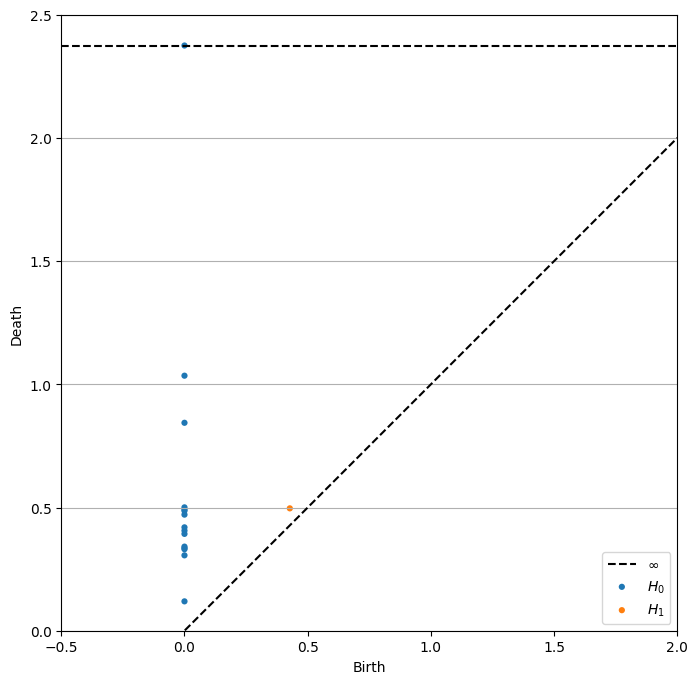

In [145]:
dgLIV = ripser(arrayPointsLIV)['dgms']
#plot_diagrams(dgLIV, show=True, xy_range=[-0.5,2,0,2.5])))
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgLIV, show=True, xy_range=[-0.5,2,0,2.5])

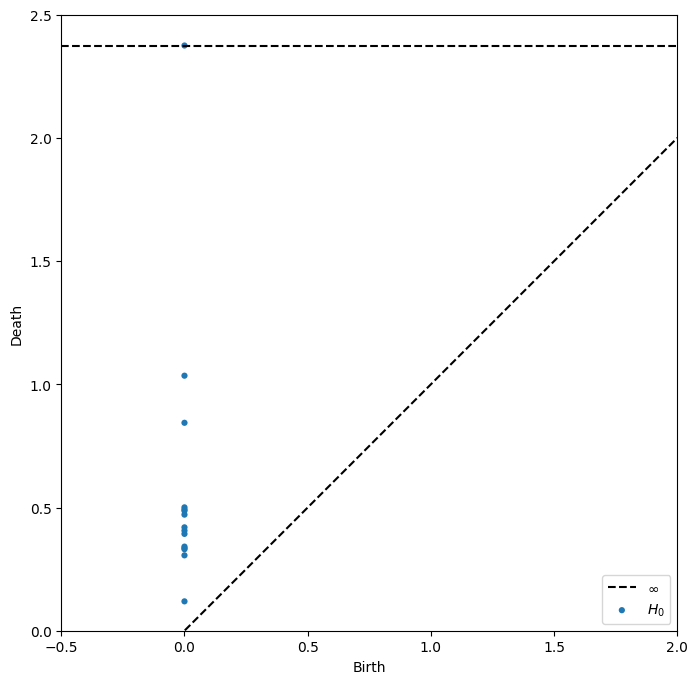

In [147]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgLIV_H0 = ripser(arrayPointsLIV)['dgms'][0]
plot_diagrams(dgLIV_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##CHE - Chelsea - 3

In [20]:
che = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/CHE.csv') 
che

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,E. Mendy,1,6,34,34,3060,0,0,0,0,0,0,658,0,1,3,3,0,0,1,14,73
1,2,A. Rudiger,2,6,34,34,3035,3,48,13,0,6,0,2199,12,35,12,9,0,56,48,14,0
2,3,Thiago Silva,2,6,32,28,2651,3,18,5,0,6,0,2432,7,12,12,2,0,65,32,11,0
3,4,M. Mount,3,6,32,27,2364,11,76,29,1,18,10,952,58,30,23,4,0,29,41,11,0
4,5,Jorginho,3,6,29,26,2278,6,16,9,6,16,2,1681,27,30,38,5,0,69,64,12,0
5,6,Marcos Alonso,2,6,28,25,2172,4,43,11,0,15,4,920,43,25,28,8,0,72,41,8,0
6,7,Azpilicueta,2,6,27,24,2074,1,11,4,0,15,2,1375,17,25,5,3,0,51,51,7,0
7,8,R. James,2,6,26,22,1865,5,37,10,0,36,9,1235,48,20,31,4,1,42,33,7,0
8,9,K. Havertz,3,6,29,22,1810,8,56,23,0,18,3,532,21,40,25,3,0,12,17,10,0
9,10,N. Kante,3,6,26,21,1778,2,17,9,0,35,4,1120,24,22,11,2,0,62,59,9,0


In [21]:
features_names = che.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [22]:
scaler = MinMaxScaler()
che[features_names] = scaler.fit_transform(che[features_names])
che

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,E. Mendy,1,6,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.194003,0.000000,0.000000,0.000000,0.250,0.0,0.000000,0.000000,1.0,1.0
1,2,A. Rudiger,2,6,1.000000,1.000000,0.985057,0.272727,0.631579,0.448276,0.000000,0.142857,0.0,0.894139,0.206897,0.871795,0.236842,1.000,0.0,0.777778,0.746032,1.0,0.0
2,3,Thiago Silva,2,6,0.866667,0.714286,0.755529,0.272727,0.236842,0.172414,0.000000,0.142857,0.0,1.000000,0.120690,0.282051,0.236842,0.125,0.0,0.902778,0.492063,0.7,0.0
3,4,M. Mount,3,6,0.866667,0.666667,0.583981,1.000000,1.000000,1.000000,0.166667,0.428571,1.0,0.327578,1.000000,0.743590,0.526316,0.375,0.0,0.402778,0.634921,0.7,0.0
4,5,Jorginho,3,6,0.666667,0.619048,0.532576,0.545455,0.210526,0.310345,1.000000,0.380952,0.2,0.658791,0.465517,0.743590,0.921053,0.500,0.0,0.958333,1.000000,0.8,0.0
5,6,Marcos Alonso,2,6,0.600000,0.571429,0.469217,0.363636,0.565789,0.379310,0.000000,0.357143,0.4,0.313040,0.741379,0.615385,0.657895,0.875,0.0,1.000000,0.634921,0.4,0.0
6,7,Azpilicueta,2,6,0.533333,0.523810,0.410640,0.090909,0.144737,0.137931,0.000000,0.357143,0.2,0.519764,0.293103,0.615385,0.052632,0.250,0.0,0.708333,0.793651,0.3,0.0
7,8,R. James,2,6,0.466667,0.428571,0.285714,0.454545,0.486842,0.344828,0.000000,0.857143,0.9,0.456156,0.827586,0.487179,0.736842,0.375,1.0,0.583333,0.507937,0.3,0.0
8,9,K. Havertz,3,6,0.666667,0.428571,0.252839,0.727273,0.736842,0.793103,0.000000,0.428571,0.3,0.136756,0.362069,1.000000,0.578947,0.250,0.0,0.166667,0.253968,0.6,0.0
9,10,N. Kante,3,6,0.466667,0.380952,0.233712,0.181818,0.223684,0.310345,0.000000,0.833333,0.4,0.403907,0.413793,0.538462,0.210526,0.125,0.0,0.861111,0.920635,0.5,0.0


In [23]:
arrayPointsCHE = np.array(che[zestaw2])
#arrayPointsCHE

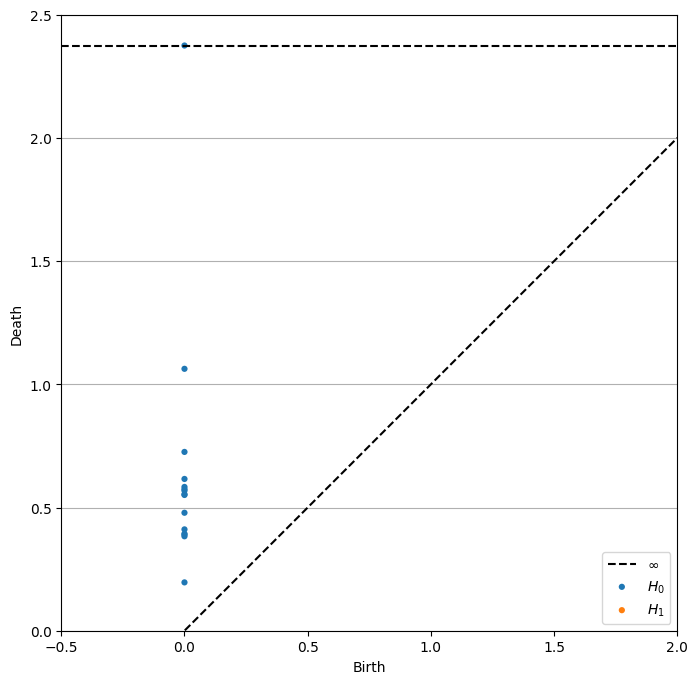

In [24]:
dgCHE = ripser(arrayPointsCHE)['dgms']
plt.grid(axis='y')
#plot_diagrams(dgCHE, show=True, xy_range=[-0.5,2,0,2.5]))
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgCHE, show=True, xy_range=[-0.5,2,0,2.5])

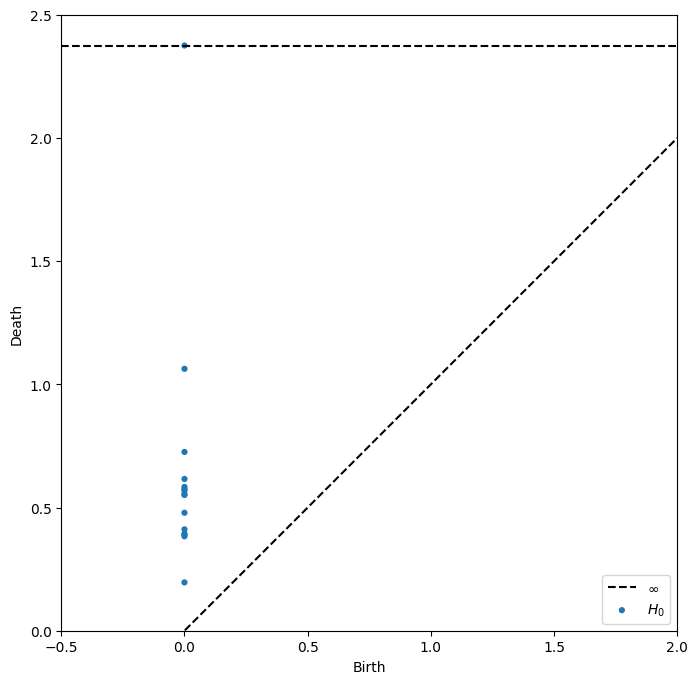

In [148]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgCHE_H0 = ripser(arrayPointsCHE)['dgms'][0]
plot_diagrams(dgCHE_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##TOT - Tottenham Hotspur - 4

In [26]:
tot = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/TOT.csv') 
tot

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,H. Lloris,1,17,38,38,3420,0,0,0,0,0,0,609,2,0,2,2,0,2,1,16,97
1,2,H. Kane,4,17,37,36,3232,17,133,55,4,54,9,614,50,42,54,5,0,8,15,14,0
2,3,P. Hojbjerg,3,17,36,36,3198,2,31,11,0,42,2,2270,25,28,39,3,0,93,78,16,0
3,4,E. Dier,2,17,35,35,3072,0,13,5,0,1,0,2049,7,12,9,1,0,36,15,16,0
4,5,Son Heung-Min,4,17,35,35,3019,23,86,49,0,51,7,879,72,14,36,2,0,19,15,16,0
5,6,B. Davies,2,17,29,28,2539,1,18,7,0,7,1,1345,11,31,18,6,0,51,36,12,0
6,7,Emerson,2,17,31,26,2289,1,15,4,0,17,1,935,28,28,45,5,0,69,72,9,0
7,8,Reguilon,2,17,25,22,1922,2,21,9,0,19,3,606,29,22,24,4,0,55,40,9,0
8,9,C. Romero,2,17,22,21,1846,1,6,2,0,9,0,1141,6,28,15,8,0,72,62,5,0
9,10,Lucas Moura,4,17,34,19,1772,2,37,12,0,56,6,556,34,20,37,4,0,28,25,8,0


In [27]:
features_names = tot.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [28]:
scaler = MinMaxScaler()
tot[features_names] = scaler.fit_transform(tot[features_names])
tot

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,H. Lloris,1,17,1.000000,1.00,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.178536,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,1.000000,1.0
1,2,H. Kane,4,17,0.956522,0.92,0.920608,0.739130,1.000000,1.000000,1.0,0.964286,1.000000,0.181009,0.685714,1.000000,1.000000,0.571429,0.0,0.065934,0.181818,0.818182,0.0
2,3,P. Hojbjerg,3,17,0.913043,0.92,0.906250,0.086957,0.233083,0.200000,0.0,0.750000,0.222222,1.000000,0.328571,0.666667,0.711538,0.285714,0.0,1.000000,1.000000,1.000000,0.0
3,4,E. Dier,2,17,0.869565,0.88,0.853041,0.000000,0.097744,0.090909,0.0,0.017857,0.000000,0.890702,0.071429,0.285714,0.134615,0.000000,0.0,0.373626,0.181818,1.000000,0.0
4,5,Son Heung-Min,4,17,0.869565,0.88,0.830659,1.000000,0.646617,0.890909,0.0,0.910714,0.777778,0.312067,1.000000,0.333333,0.653846,0.142857,0.0,0.186813,0.181818,1.000000,0.0
5,6,B. Davies,2,17,0.608696,0.60,0.627956,0.043478,0.135338,0.127273,0.0,0.125000,0.111111,0.542532,0.128571,0.738095,0.307692,0.714286,0.0,0.538462,0.454545,0.636364,0.0
6,7,Emerson,2,17,0.695652,0.52,0.522382,0.043478,0.112782,0.072727,0.0,0.303571,0.111111,0.339763,0.371429,0.666667,0.826923,0.571429,0.0,0.736264,0.922078,0.363636,0.0
7,8,Reguilon,2,17,0.434783,0.36,0.367399,0.086957,0.157895,0.163636,0.0,0.339286,0.333333,0.177052,0.385714,0.523810,0.423077,0.428571,0.0,0.582418,0.506494,0.363636,0.0
8,9,C. Romero,2,17,0.304348,0.32,0.335304,0.043478,0.045113,0.036364,0.0,0.160714,0.000000,0.441642,0.057143,0.666667,0.250000,1.000000,0.0,0.769231,0.792208,0.000000,0.0
9,10,Lucas Moura,4,17,0.826087,0.24,0.304054,0.086957,0.278195,0.218182,0.0,1.000000,0.666667,0.152324,0.457143,0.476190,0.673077,0.428571,0.0,0.285714,0.311688,0.272727,0.0


In [29]:
arrayPointsTOT = np.array(tot[zestaw2])
#arrayPointsTOT

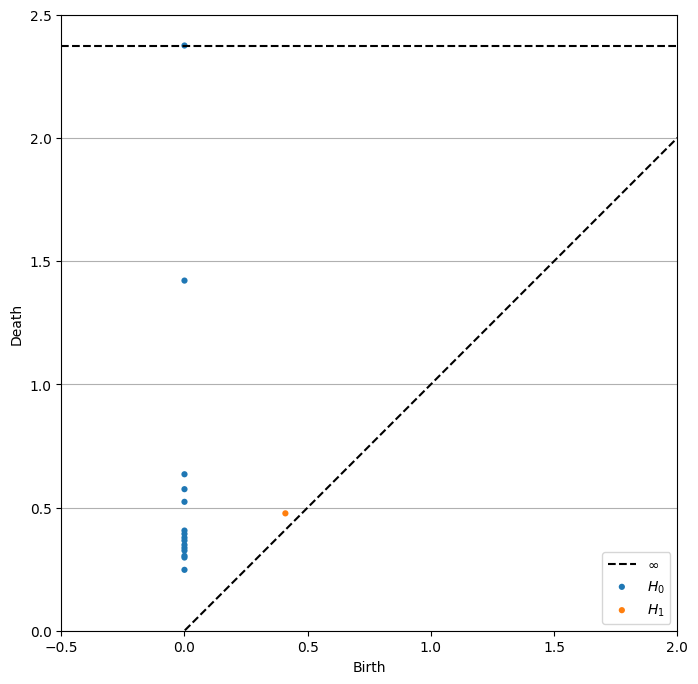

In [30]:
dgTOT = ripser(arrayPointsTOT)['dgms']
plt.grid(axis='y')
#plot_diagrams(dgTOT, show=True, xy_range=[-0.5,2,0,2.5]))
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgTOT, show=True, xy_range=[-0.5,2,0,2.5])

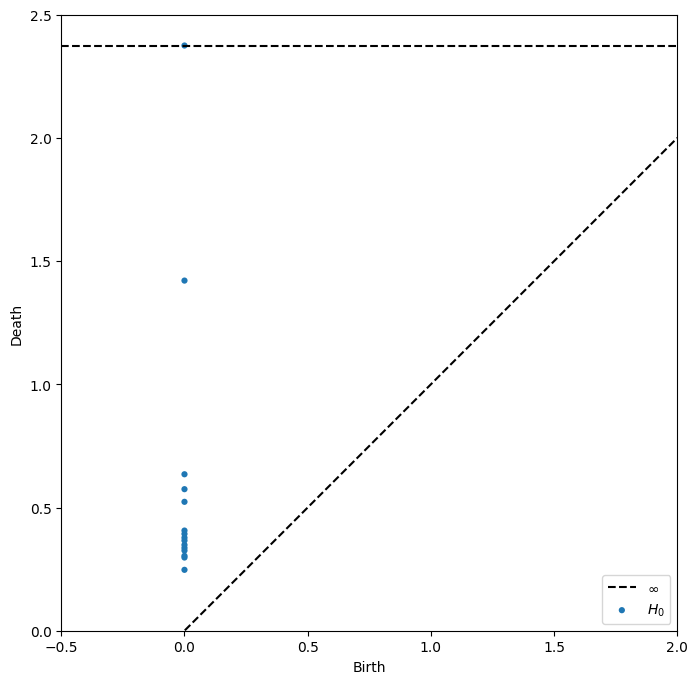

In [149]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgTOT_H0 = ripser(arrayPointsTOT)['dgms'][0]
plot_diagrams(dgTOT_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##ARS - Arsenal - 5

In [32]:
ars = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/ARS.csv')
ars

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Gabriel Magalhaes,2,1,35,35,3068,5,29,12,0,4,0,1824,10,23,38,6,1,43,50,13,0
1,2,A. Ramsdale,1,1,34,34,3060,0,0,0,0,1,0,633,0,0,5,1,0,1,2,12,90
2,3,B. Saka,3,1,38,36,2991,11,97,31,2,43,7,845,68,39,59,6,0,43,40,13,0
3,4,B. White,2,1,32,32,2880,0,12,4,0,10,0,1530,13,19,28,3,0,65,44,13,0
4,5,M. Odegaard,3,1,36,32,2791,7,53,21,0,25,4,1338,76,27,20,4,0,32,49,11,0
5,6,G. Xhaka,3,1,27,27,2331,1,27,5,0,19,2,1338,32,29,19,10,1,39,32,6,0
6,7,T. Partey,3,1,24,23,2032,2,44,10,0,35,1,1031,17,33,17,5,0,52,43,10,0
7,8,E. Smith Rowe,3,1,33,21,1920,10,40,23,0,32,2,669,30,5,21,1,0,22,14,7,0
8,9,K. Tierney,2,1,22,22,1918,1,15,5,0,9,3,746,20,5,16,0,0,29,18,10,0
9,10,Gabriel Martinelli,4,1,29,21,1866,6,52,16,1,45,6,418,34,24,20,1,1,39,27,6,0


In [33]:
features_names = ars.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [34]:
scaler = MinMaxScaler()
ars[features_names] = scaler.fit_transform(ars[features_names])
ars

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Gabriel Magalhaes,2,1,0.842105,0.958333,1.000000,0.454545,0.298969,0.387097,0.0,0.068182,0.000000,1.000000,0.131579,0.589744,0.611111,0.6,1.0,0.656250,1.000000,1.0,0.0
1,2,A. Ramsdale,1,1,0.789474,0.916667,0.995866,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.197980,0.000000,0.000000,0.000000,0.1,0.0,0.000000,0.000000,0.9,1.0
2,3,B. Saka,3,1,1.000000,1.000000,0.960207,1.000000,1.000000,1.000000,1.0,0.954545,1.000000,0.340741,0.894737,1.000000,1.000000,0.6,0.0,0.656250,0.791667,1.0,0.0
3,4,B. White,2,1,0.684211,0.833333,0.902842,0.000000,0.123711,0.129032,0.0,0.204545,0.000000,0.802020,0.171053,0.487179,0.425926,0.3,0.0,1.000000,0.875000,1.0,0.0
4,5,M. Odegaard,3,1,0.894737,0.833333,0.856848,0.636364,0.546392,0.677419,0.0,0.545455,0.571429,0.672727,1.000000,0.692308,0.277778,0.4,0.0,0.484375,0.979167,0.8,0.0
5,6,G. Xhaka,3,1,0.421053,0.625000,0.619121,0.090909,0.278351,0.161290,0.0,0.409091,0.285714,0.672727,0.421053,0.743590,0.259259,1.0,1.0,0.593750,0.625000,0.3,0.0
6,7,T. Partey,3,1,0.263158,0.458333,0.464599,0.181818,0.453608,0.322581,0.0,0.772727,0.142857,0.465993,0.223684,0.846154,0.222222,0.5,0.0,0.796875,0.854167,0.7,0.0
7,8,E. Smith Rowe,3,1,0.736842,0.375000,0.406718,0.909091,0.412371,0.741935,0.0,0.704545,0.285714,0.222222,0.394737,0.128205,0.296296,0.1,0.0,0.328125,0.250000,0.4,0.0
8,9,K. Tierney,2,1,0.157895,0.416667,0.405685,0.090909,0.154639,0.161290,0.0,0.181818,0.428571,0.274074,0.263158,0.128205,0.203704,0.0,0.0,0.437500,0.333333,0.7,0.0
9,10,Gabriel Martinelli,4,1,0.526316,0.375000,0.378811,0.545455,0.536082,0.516129,0.5,1.000000,0.857143,0.053199,0.447368,0.615385,0.277778,0.1,1.0,0.593750,0.520833,0.3,0.0


In [35]:
arrayPointsARS = np.array(ars[zestaw2])
#arrayPointsARS

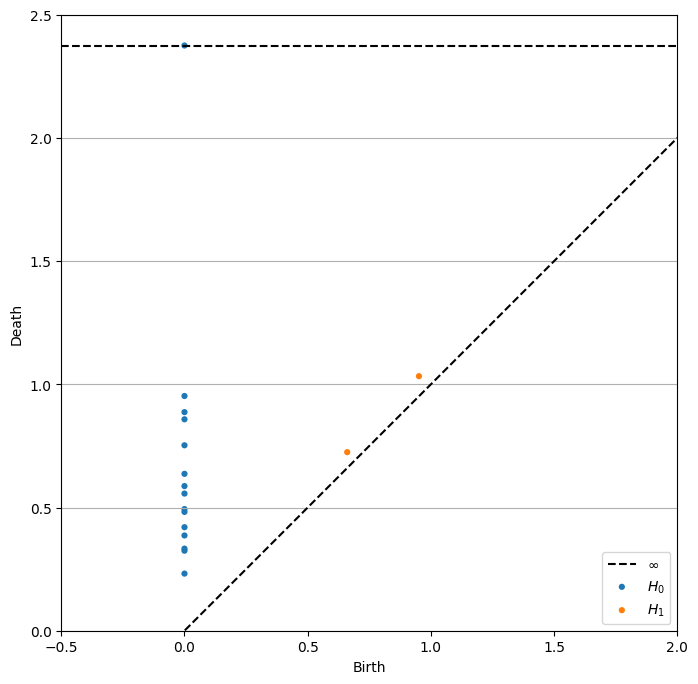

In [36]:
dgARS = ripser(arrayPointsARS)['dgms']
#plot_diagrams(dgARS, show=True, xy_range=[-0.5,2,0,2.5]))
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgARS, show=True, xy_range=[-0.5,2,0,2.5])

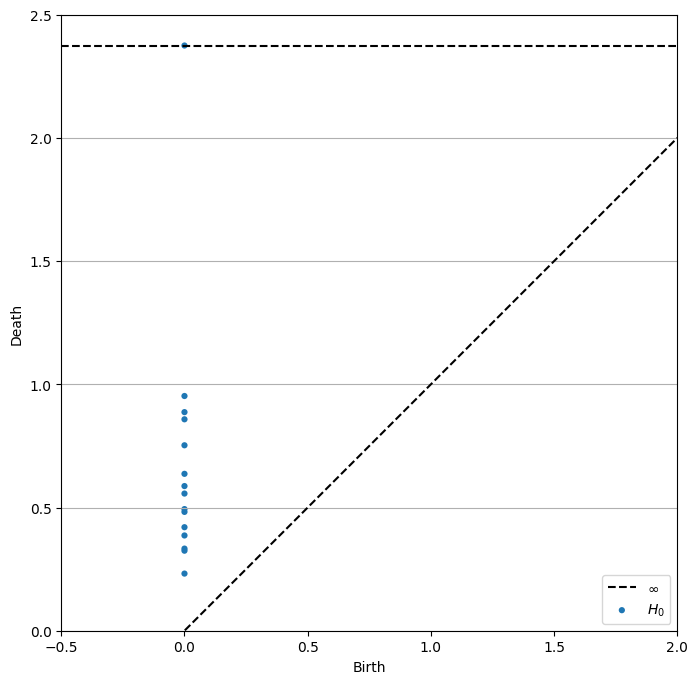

In [150]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgARS_H0 = ripser(arrayPointsARS)['dgms'][0]
plt.grid(axis='y')
plot_diagrams(dgARS_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##MUN - Manchester United - 6

In [38]:
mun = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/MUN.csv') 
mun

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,David de Gea,1,13,38,38,3420,0,0,0,0,0,0,543,0,0,1,0,0,0,0,8,127
1,2,Bruno Fernandes,3,13,36,35,3118,10,89,29,0,26,6,1488,89,33,47,10,0,45,54,8,0
2,3,H. Maguire,2,13,30,28,2514,1,23,10,0,4,0,1350,4,21,19,7,1,53,34,6,0
3,4,C. Ronaldo,4,13,30,27,2458,18,110,43,3,20,3,720,26,16,18,8,0,8,8,7,0
4,5,S. McTominay,3,13,30,28,2392,1,27,7,0,36,1,1055,23,55,33,9,0,64,65,6,0
5,6,V. Lindelof,2,13,28,26,2355,0,3,2,0,3,2,1209,4,19,6,4,0,36,16,6,0
6,7,Fred,3,13,28,24,2035,4,15,9,0,21,4,1129,28,31,30,5,0,59,63,7,0
7,8,J. Sancho,4,13,29,20,1902,3,26,9,0,47,3,781,41,4,7,0,0,23,14,4,0
8,9,R. Varane,2,13,22,20,1829,1,9,1,0,2,1,1011,4,5,7,0,0,37,28,5,0
9,10,Diogo Dalot,2,13,24,19,1799,0,13,4,0,17,0,771,16,18,4,4,0,70,55,5,0


In [39]:
features_names = mun.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [40]:
scaler = MinMaxScaler()
mun[features_names] = scaler.fit_transform(mun[features_names])
mun

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,David de Gea,1,13,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.0
1,2,Bruno Fernandes,3,13,0.888889,0.863636,0.853824,0.555556,0.809091,0.674419,0.0,0.553191,0.666667,1.000000,1.000000,0.600000,1.000000,1.0,0.0,0.642857,0.830769,1.000000,0.0
2,3,H. Maguire,2,13,0.555556,0.545455,0.561471,0.055556,0.209091,0.232558,0.0,0.085106,0.000000,0.853968,0.044944,0.381818,0.391304,0.7,1.0,0.757143,0.523077,0.666667,0.0
3,4,C. Ronaldo,4,13,0.555556,0.500000,0.534366,1.000000,1.000000,1.000000,1.0,0.425532,0.333333,0.187302,0.292135,0.290909,0.369565,0.8,0.0,0.114286,0.123077,0.833333,0.0
4,5,S. McTominay,3,13,0.555556,0.545455,0.502420,0.055556,0.245455,0.162791,0.0,0.765957,0.111111,0.541799,0.258427,1.000000,0.695652,0.9,0.0,0.914286,1.000000,0.666667,0.0
5,6,V. Lindelof,2,13,0.444444,0.454545,0.484511,0.000000,0.027273,0.046512,0.0,0.063830,0.222222,0.704762,0.044944,0.345455,0.108696,0.4,0.0,0.514286,0.246154,0.666667,0.0
6,7,Fred,3,13,0.444444,0.363636,0.329622,0.222222,0.136364,0.209302,0.0,0.446809,0.444444,0.620106,0.314607,0.563636,0.630435,0.5,0.0,0.842857,0.969231,0.833333,0.0
7,8,J. Sancho,4,13,0.500000,0.181818,0.265247,0.166667,0.236364,0.209302,0.0,1.000000,0.333333,0.251852,0.460674,0.072727,0.130435,0.0,0.0,0.328571,0.215385,0.333333,0.0
8,9,R. Varane,2,13,0.111111,0.181818,0.229913,0.055556,0.081818,0.023256,0.0,0.042553,0.111111,0.495238,0.044944,0.090909,0.130435,0.0,0.0,0.528571,0.430769,0.500000,0.0
9,10,Diogo Dalot,2,13,0.222222,0.136364,0.215392,0.000000,0.118182,0.093023,0.0,0.361702,0.000000,0.241270,0.179775,0.327273,0.065217,0.4,0.0,1.000000,0.846154,0.500000,0.0


In [41]:
arrayPointsMUN = np.array(mun[zestaw2])
#arrayPointsMUN

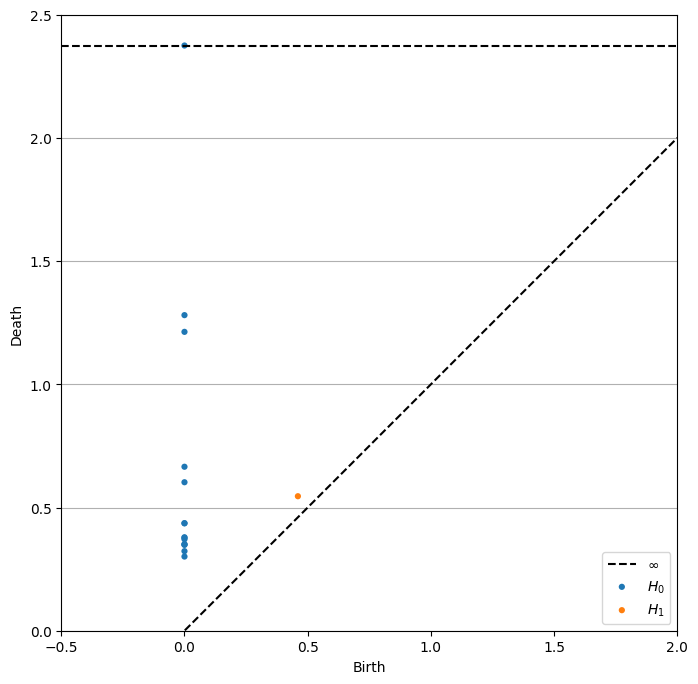

In [42]:
dgMUN = ripser(arrayPointsMUN)['dgms']
#plot_diagrams(dgMUN, show=True, xy_range=[-0.5,2,0,2.5]))
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgMUN, show=True, xy_range=[-0.5,2,0,2.5])

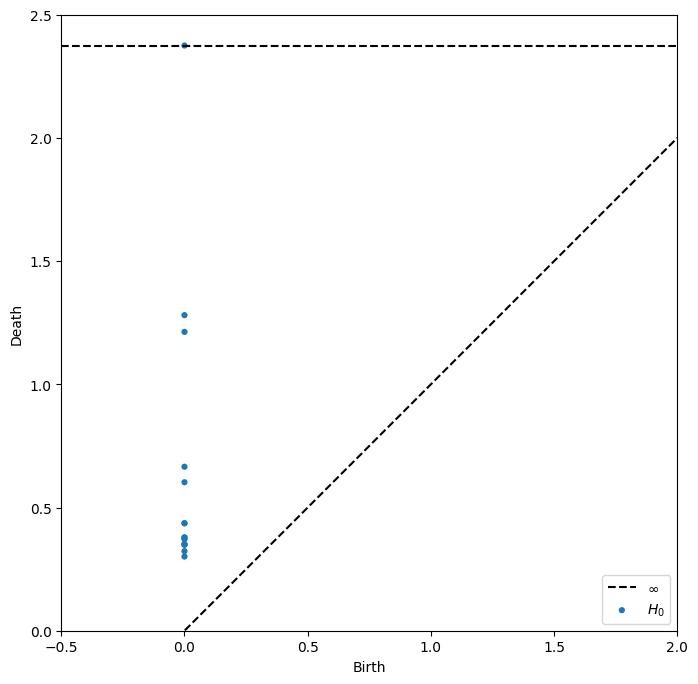

In [151]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgMUN_H0 = ripser(arrayPointsMUN)['dgms'][0]
plot_diagrams(dgMUN_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##WHU - West Ham United - 7

In [44]:
whu = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/WHU.csv') 
whu

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,L. Fabianski,1,19,37,37,3330,0,0,0,0,0,0,503,0,1,5,2,0,0,0,8,114
1,2,D. Rice,3,19,36,35,3178,1,26,8,0,50,4,1973,24,28,10,8,0,105,80,8,0
2,3,T. Soucek,3,19,35,34,3062,5,45,12,0,10,1,1029,21,39,18,3,0,84,66,6,0
3,4,J. Bowen,3,19,36,34,2987,12,79,34,0,50,10,544,41,25,43,6,0,41,36,8,0
4,5,M. Antonio,4,19,36,34,2975,10,83,29,0,50,8,415,45,50,52,6,1,20,23,7,0
5,6,Pablo Fornals,3,19,36,32,2799,6,43,12,0,23,3,1027,48,24,28,4,0,55,54,7,0
6,7,C. Dawson,2,19,34,30,2754,2,25,6,0,4,2,1032,4,39,12,4,1,46,29,6,0
7,8,A. Cresswell,2,19,31,31,2728,2,18,4,0,8,3,1412,31,14,10,3,0,53,28,7,0
8,9,V. Coufal,2,19,28,25,2211,0,11,5,0,15,4,747,21,29,15,3,1,47,45,5,0
9,10,S. Benrahma,4,19,32,26,2184,8,63,22,0,37,6,618,32,9,15,0,0,26,28,6,0


In [45]:
features_names = whu.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [46]:
scaler = MinMaxScaler()
whu[features_names] = scaler.fit_transform(whu[features_names])
whu

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,L. Fabianski,1,19,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.066667,0.000000,0.000000,0.040816,0.250,0.0,0.000000,0.0000,1.000000,1.0
1,2,D. Rice,3,19,0.961538,0.925926,0.936877,0.083333,0.313253,0.235294,0.0,1.00,0.4,1.000000,0.500000,0.551020,0.142857,1.000,0.0,1.000000,1.0000,1.000000,0.0
2,3,T. Soucek,3,19,0.923077,0.888889,0.888704,0.416667,0.542169,0.352941,0.0,0.20,0.1,0.400635,0.437500,0.775510,0.306122,0.375,0.0,0.800000,0.8250,0.666667,0.0
3,4,J. Bowen,3,19,0.961538,0.888889,0.857558,1.000000,0.951807,1.000000,0.0,1.00,1.0,0.092698,0.854167,0.489796,0.816327,0.750,0.0,0.390476,0.4500,1.000000,0.0
4,5,M. Antonio,4,19,0.961538,0.888889,0.852575,0.833333,1.000000,0.852941,0.0,1.00,0.8,0.010794,0.937500,1.000000,1.000000,0.750,1.0,0.190476,0.2875,0.833333,0.0
5,6,Pablo Fornals,3,19,0.961538,0.814815,0.779485,0.500000,0.518072,0.352941,0.0,0.46,0.3,0.399365,1.000000,0.469388,0.510204,0.500,0.0,0.523810,0.6750,0.833333,0.0
6,7,C. Dawson,2,19,0.884615,0.740741,0.760797,0.166667,0.301205,0.176471,0.0,0.08,0.2,0.402540,0.083333,0.775510,0.183673,0.500,1.0,0.438095,0.3625,0.666667,0.0
7,8,A. Cresswell,2,19,0.769231,0.777778,0.750000,0.166667,0.216867,0.117647,0.0,0.16,0.3,0.643810,0.645833,0.265306,0.142857,0.375,0.0,0.504762,0.3500,0.833333,0.0
8,9,V. Coufal,2,19,0.653846,0.555556,0.535299,0.000000,0.132530,0.147059,0.0,0.30,0.4,0.221587,0.437500,0.571429,0.244898,0.375,1.0,0.447619,0.5625,0.500000,0.0
9,10,S. Benrahma,4,19,0.807692,0.592593,0.524086,0.666667,0.759036,0.647059,0.0,0.74,0.6,0.139683,0.666667,0.163265,0.244898,0.000,0.0,0.247619,0.3500,0.666667,0.0


In [47]:
arrayPointsWHU = np.array(whu[zestaw2])
#arrayPoints

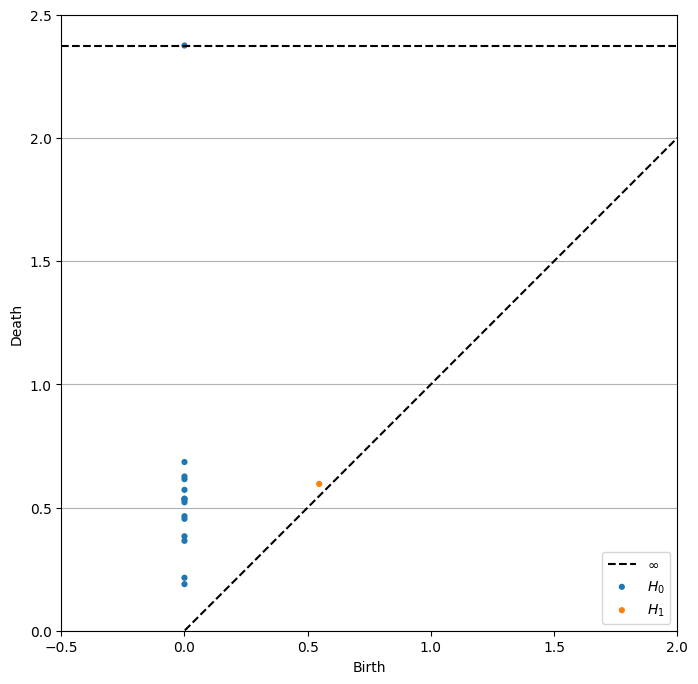

In [48]:
dgWHU = ripser(arrayPointsWHU)['dgms']
#plot_diagrams(dgWHU, show=True, xy_range=[-0.5,2,0,2.5]))
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgWHU, show=True, xy_range=[-0.5,2,0,2.5])

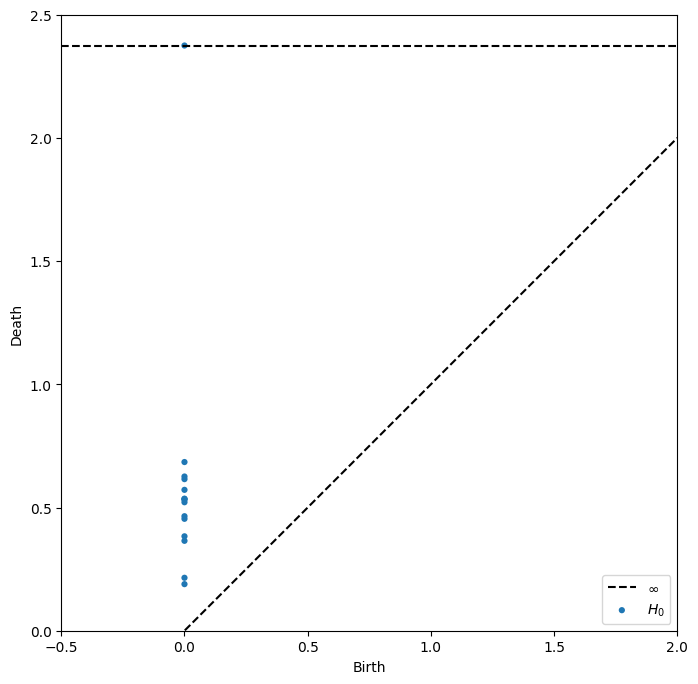

In [152]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgWHU_H0 = ripser(arrayPointsWHU)['dgms'][0]
plot_diagrams(dgWHU_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##LEI - Leicester City - 8

In [50]:
lei = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/LEI.csv') 
lei

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,K. Schmeichel,1,10,37,37,3330,0,0,0,0,1,0,783,1,0,2,2,0,1,0,7,131
1,2,Y. Tielemans,3,10,32,29,2633,6,59,17,2,25,4,1425,37,32,36,3,0,60,74,6,0
2,3,C. Soyuncu,2,10,28,28,2498,1,8,1,0,4,0,1625,3,24,14,5,0,62,47,5,0
3,4,J. Maddison,3,10,35,28,2466,12,72,34,0,31,8,770,48,22,64,3,0,31,40,5,0
4,5,T. Castagne,2,10,27,22,2126,1,7,3,0,6,0,903,15,15,7,1,0,60,67,4,0
5,6,D. Amartey,3,10,28,23,2119,0,2,1,0,6,0,1393,4,14,8,4,0,34,26,5,0
6,7,H. Barnes,3,10,32,24,2105,6,66,24,0,31,10,538,29,19,20,2,0,21,31,5,0
7,8,K. Dewsbury-Hall,3,10,28,23,2105,1,21,3,0,30,2,932,35,20,29,4,0,45,39,6,0
8,9,L. Thomas,2,10,22,21,1912,0,4,0,0,15,1,820,12,15,16,2,0,71,50,5,0
9,10,J. Vardy,4,10,25,20,1805,15,54,26,0,9,2,182,18,13,12,2,0,6,6,4,0


In [51]:
features_names = lei.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [52]:
scaler = MinMaxScaler()
lei[features_names] = scaler.fit_transform(lei[features_names])
lei

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,K. Schmeichel,1,10,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.423682,0.000000,0.00000,0.000000,0.25,0.0,0.000000,0.000000,1.000000,1.0
1,2,Y. Tielemans,3,10,0.736842,0.666667,0.678654,0.400000,0.819444,0.500000,1.0,0.648649,0.4,0.863107,0.765957,1.00000,0.548387,0.50,0.0,0.808219,1.000000,0.857143,0.0
2,3,C. Soyuncu,2,10,0.526316,0.625000,0.616413,0.066667,0.111111,0.029412,0.0,0.081081,0.0,1.000000,0.042553,0.75000,0.193548,1.00,0.0,0.835616,0.635135,0.714286,0.0
3,4,J. Maddison,3,10,0.894737,0.625000,0.601660,0.800000,1.000000,1.000000,0.0,0.810811,0.8,0.414784,1.000000,0.68750,1.000000,0.50,0.0,0.410959,0.540541,0.714286,0.0
4,5,T. Castagne,2,10,0.473684,0.375000,0.444905,0.066667,0.097222,0.088235,0.0,0.135135,0.0,0.505818,0.297872,0.46875,0.080645,0.00,0.0,0.808219,0.905405,0.571429,0.0
5,6,D. Amartey,3,10,0.526316,0.416667,0.441678,0.000000,0.027778,0.029412,0.0,0.135135,0.0,0.841205,0.063830,0.43750,0.096774,0.75,0.0,0.452055,0.351351,0.714286,0.0
6,7,H. Barnes,3,10,0.736842,0.458333,0.435224,0.400000,0.916667,0.705882,0.0,0.810811,1.0,0.255989,0.595745,0.59375,0.290323,0.25,0.0,0.273973,0.418919,0.714286,0.0
7,8,K. Dewsbury-Hall,3,10,0.526316,0.416667,0.435224,0.066667,0.291667,0.088235,0.0,0.783784,0.2,0.525667,0.723404,0.62500,0.435484,0.75,0.0,0.602740,0.527027,0.857143,0.0
8,9,L. Thomas,2,10,0.210526,0.333333,0.346243,0.000000,0.055556,0.000000,0.0,0.378378,0.1,0.449008,0.234043,0.46875,0.225806,0.25,0.0,0.958904,0.675676,0.714286,0.0
9,10,J. Vardy,4,10,0.368421,0.291667,0.296911,1.000000,0.750000,0.764706,0.0,0.216216,0.2,0.012320,0.361702,0.40625,0.161290,0.25,0.0,0.068493,0.081081,0.571429,0.0


In [53]:
arrayPointsLEI = np.array(lei[zestaw2])
#arrayPoints

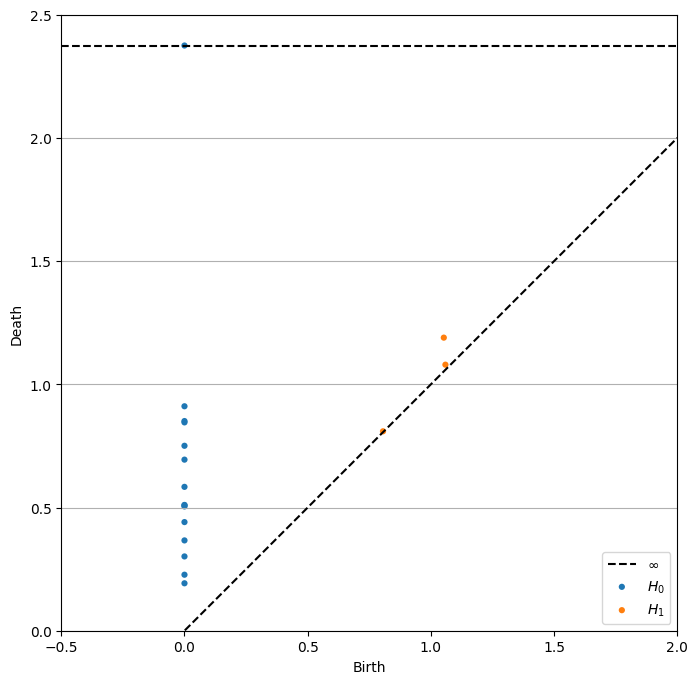

In [54]:
dgLEI = ripser(arrayPointsLEI)['dgms']
#plot_diagrams(dgLEI, show=True, xy_range=[-0.5,2,0,2.5]))
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgLEI, show=True, xy_range=[-0.5,2,0,2.5])

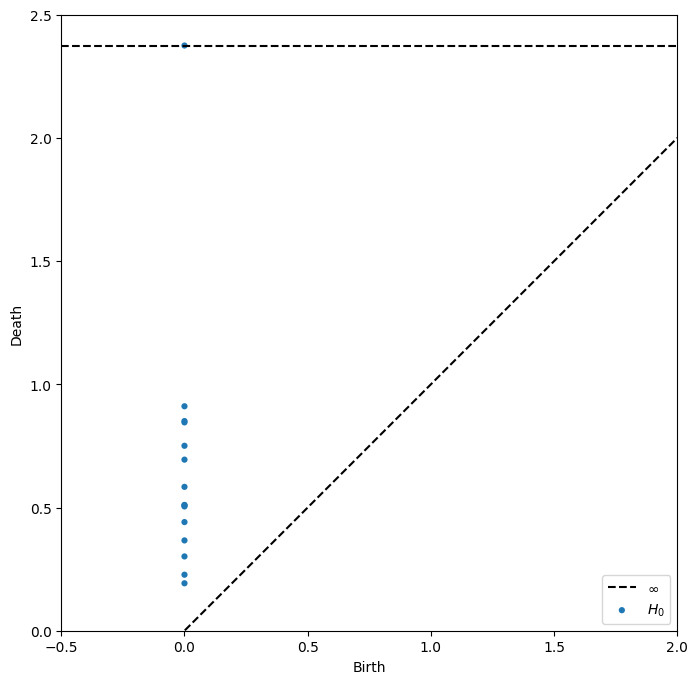

In [153]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgLEI_H0 = ripser(arrayPointsLEI)['dgms'][0]
plot_diagrams(dgLEI_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##BHA -	Brighton & Hove Albion - 9

In [56]:
bha = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/BHA.csv') 
bha

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Robert Sanchez,1,4,37,37,3329,0,0,0,0,0,0,898,3,1,2,3,1,1,2,11,101
1,2,Cucurella,3,4,35,35,3092,1,18,3,0,28,1,1557,42,28,30,6,0,92,93,10,0
2,3,J. Veltman,2,4,34,33,2881,1,12,3,0,16,1,1263,17,39,38,6,0,93,74,8,0
3,4,L. Trossard,3,4,34,32,2810,8,74,27,1,56,3,874,47,24,26,2,0,35,34,9,0
4,5,L. Dunk,2,4,29,29,2574,1,19,7,0,4,0,1719,3,9,4,3,1,35,10,10,0
5,6,N. Maupay,4,4,32,25,2275,8,61,15,1,21,2,469,23,33,31,7,0,12,17,7,0
6,7,Y. Bissouma,3,4,26,25,2116,1,21,5,0,34,2,1059,8,30,19,10,0,99,76,6,0
7,8,A. Mac Allister,3,4,33,22,2116,5,60,11,2,21,2,840,31,30,39,4,0,53,65,6,0
8,9,P. Gross,3,4,29,24,2043,2,24,9,0,9,4,920,60,15,6,1,0,33,28,8,0
9,10,S. March,3,4,31,17,1739,0,20,10,0,23,2,494,35,31,20,1,0,34,30,4,0


In [57]:
features_names = bha.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [58]:
scaler = MinMaxScaler()
bha[features_names] = scaler.fit_transform(bha[features_names])
bha

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Robert Sanchez,1,4,1.000000,1.000000,1.000000,0.000,0.000000,0.000000,0.0,0.000000,0.00,0.455209,0.000000,0.000000,0.000000,0.3,1.0,0.000000,0.000000,1.000000,1.0
1,2,Cucurella,3,4,0.894737,0.909091,0.874934,0.125,0.243243,0.111111,0.0,0.500000,0.25,0.892502,0.684211,0.710526,0.583333,0.6,0.0,0.928571,1.000000,0.857143,0.0
2,3,J. Veltman,2,4,0.842105,0.818182,0.763588,0.125,0.162162,0.111111,0.0,0.285714,0.25,0.697412,0.245614,1.000000,0.750000,0.6,0.0,0.938776,0.791209,0.571429,0.0
3,4,L. Trossard,3,4,0.842105,0.772727,0.726121,1.000,1.000000,1.000000,0.5,1.000000,0.75,0.439283,0.771930,0.605263,0.500000,0.2,0.0,0.346939,0.351648,0.714286,0.0
4,5,L. Dunk,2,4,0.578947,0.636364,0.601583,0.125,0.256757,0.259259,0.0,0.071429,0.00,1.000000,0.000000,0.210526,0.041667,0.3,1.0,0.346939,0.087912,0.857143,0.0
5,6,N. Maupay,4,4,0.736842,0.454545,0.443799,1.000,0.824324,0.555556,0.5,0.375000,0.50,0.170537,0.350877,0.842105,0.604167,0.7,0.0,0.112245,0.164835,0.428571,0.0
6,7,Y. Bissouma,3,4,0.421053,0.454545,0.359894,0.125,0.283784,0.185185,0.0,0.607143,0.50,0.562044,0.087719,0.763158,0.354167,1.0,0.0,1.000000,0.813187,0.285714,0.0
7,8,A. Mac Allister,3,4,0.789474,0.318182,0.359894,0.625,0.810811,0.407407,1.0,0.375000,0.50,0.416722,0.491228,0.763158,0.770833,0.4,0.0,0.530612,0.692308,0.285714,0.0
8,9,P. Gross,3,4,0.578947,0.409091,0.321372,0.250,0.324324,0.333333,0.0,0.160714,1.00,0.469808,1.000000,0.368421,0.083333,0.1,0.0,0.326531,0.285714,0.571429,0.0
9,10,S. March,3,4,0.684211,0.090909,0.160950,0.000,0.270270,0.370370,0.0,0.410714,0.50,0.187127,0.561404,0.789474,0.375000,0.1,0.0,0.336735,0.307692,0.000000,0.0


In [59]:
arrayPointsBHA = np.array(bha[zestaw2])
#arrayPoints

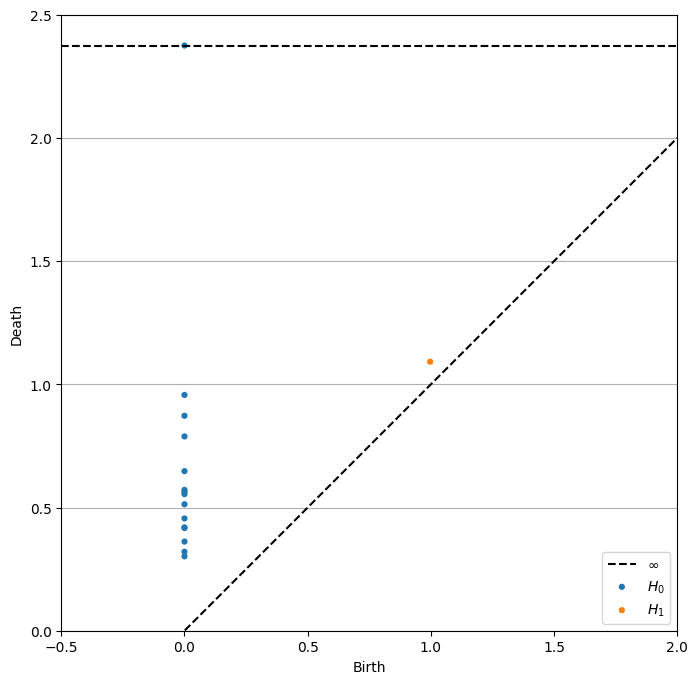

In [60]:
dgBHA = ripser(arrayPointsBHA)['dgms']
#plot_diagrams(dgBHA, show=True, xy_range=[-0.5,2,0,2.5]))
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgBHA, show=True, xy_range=[-0.5,2,0,2.5])

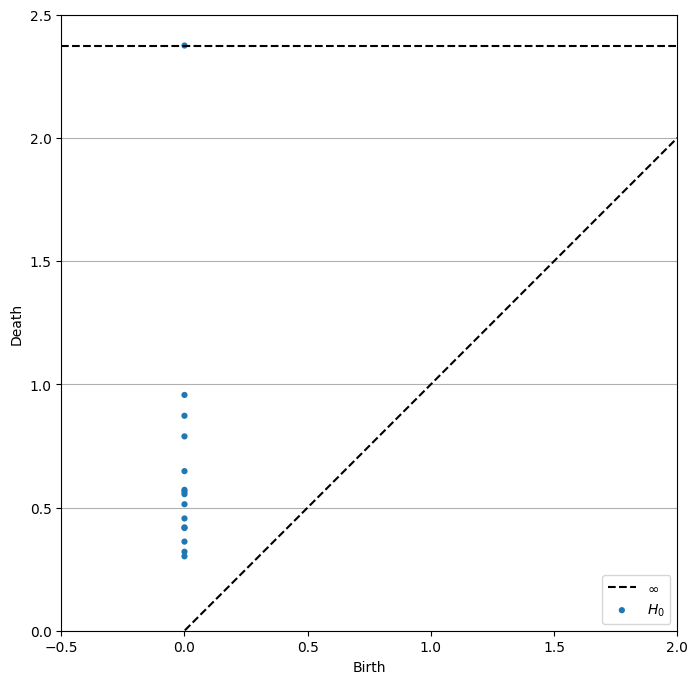

In [154]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgBHA_H0 = ripser(arrayPointsBHA)['dgms'][0]
plt.grid(axis='y')
plot_diagrams(dgBHA_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##WOL - Wolverhampton Wanderers - 10

In [62]:
wol = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/WOL.csv') 
wol

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,C. Coady,2,20,38,38,3363,4,12,4,0,1,0,1514,3,20,1,5,0,42,31,11,0
1,2,Jose Sa,1,20,37,37,3285,0,0,0,0,4,1,560,3,3,12,3,0,3,2,11,121
2,3,Joao Moutinho,3,20,35,34,2975,2,20,7,0,16,1,1665,39,36,15,4,0,73,74,10,0
3,4,R. Saiss,2,20,31,31,2708,2,18,6,0,7,0,1426,7,30,15,6,0,85,40,11,0
4,5,M. Kilman,2,20,30,30,2688,1,13,4,0,17,0,1306,3,17,11,3,0,71,50,10,0
5,6,Ruben Neves,3,20,33,31,2662,4,42,16,0,26,2,1621,25,25,12,9,0,78,68,9,0
6,7,R. Jimenez,4,20,34,30,2637,6,57,16,1,36,4,538,38,43,48,5,2,27,29,10,0
7,8,Nelson Semedo,2,20,25,25,2137,0,19,4,0,39,1,706,18,23,24,1,0,60,58,8,0
8,9,L. Dendoncker,3,20,30,21,1946,2,23,10,0,5,2,706,11,13,6,4,0,26,42,5,0
9,10,R. Ait Nouri,2,20,23,20,1827,1,13,4,0,42,2,578,17,14,20,4,0,58,64,5,0


In [63]:
features_names = wol.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [64]:
scaler = MinMaxScaler()
wol[features_names] = scaler.fit_transform(wol[features_names])
wol

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,C. Coady,2,20,1.00,1.000000,1.000000,0.666667,0.210526,0.2500,0.0,0.000000,0.00,0.885606,0.000000,0.425,0.000000,0.555556,0.0,0.475610,0.402778,1.000000,0.0
1,2,Jose Sa,1,20,0.96,0.964286,0.966681,0.000000,0.000000,0.0000,0.0,0.069767,0.25,0.162879,0.000000,0.000,0.234043,0.333333,0.0,0.000000,0.000000,1.000000,1.0
2,3,Joao Moutinho,3,20,0.88,0.857143,0.834259,0.333333,0.350877,0.4375,0.0,0.348837,0.25,1.000000,1.000000,0.825,0.297872,0.444444,0.0,0.853659,1.000000,0.888889,0.0
3,4,R. Saiss,2,20,0.72,0.750000,0.720205,0.333333,0.315789,0.3750,0.0,0.139535,0.00,0.818939,0.111111,0.675,0.297872,0.666667,0.0,1.000000,0.527778,1.000000,0.0
4,5,M. Kilman,2,20,0.68,0.714286,0.711662,0.166667,0.228070,0.2500,0.0,0.372093,0.00,0.728030,0.000000,0.350,0.212766,0.333333,0.0,0.829268,0.666667,0.888889,0.0
5,6,Ruben Neves,3,20,0.80,0.750000,0.700555,0.666667,0.736842,1.0000,0.0,0.581395,0.50,0.966667,0.611111,0.550,0.234043,1.000000,0.0,0.914634,0.916667,0.777778,0.0
6,7,R. Jimenez,4,20,0.84,0.714286,0.689876,1.000000,1.000000,1.0000,1.0,0.813953,1.00,0.146212,0.972222,1.000,1.000000,0.555556,1.0,0.292683,0.375000,0.888889,0.0
7,8,Nelson Semedo,2,20,0.48,0.535714,0.476292,0.000000,0.333333,0.2500,0.0,0.883721,0.25,0.273485,0.416667,0.500,0.489362,0.111111,0.0,0.695122,0.777778,0.666667,0.0
8,9,L. Dendoncker,3,20,0.68,0.392857,0.394703,0.333333,0.403509,0.6250,0.0,0.093023,0.50,0.273485,0.222222,0.250,0.106383,0.444444,0.0,0.280488,0.555556,0.333333,0.0
9,10,R. Ait Nouri,2,20,0.40,0.357143,0.343870,0.166667,0.228070,0.2500,0.0,0.953488,0.50,0.176515,0.388889,0.275,0.404255,0.444444,0.0,0.670732,0.861111,0.333333,0.0


In [65]:
arrayPointsWOL = np.array(wol[zestaw2])
#arrayPoints

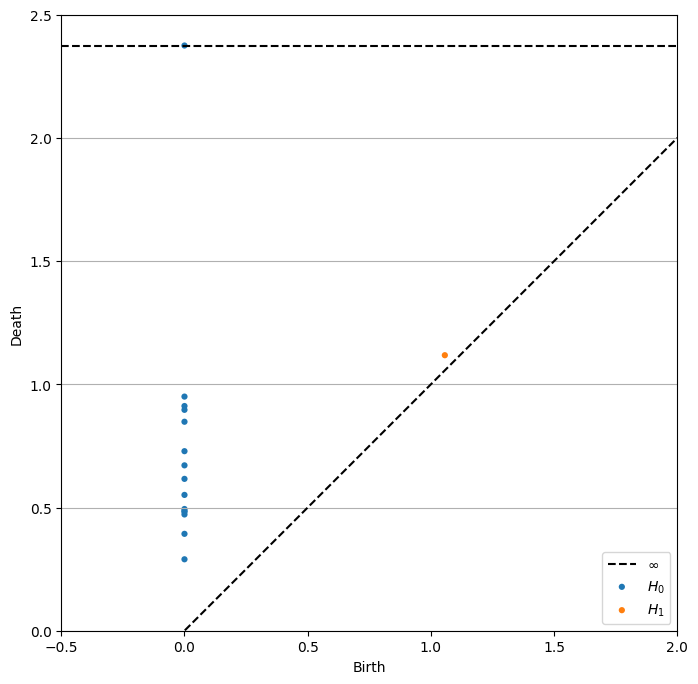

In [66]:
dgWOL = ripser(arrayPointsWOL)['dgms']
#plot_diagrams(dgWOL, show=True, xy_range=[-0.5,2,0,2.5]))
plt.grid(axis='y')
plot_diagrams(dgWOL, show=True, xy_range=[-0.5,2,0,2.5])

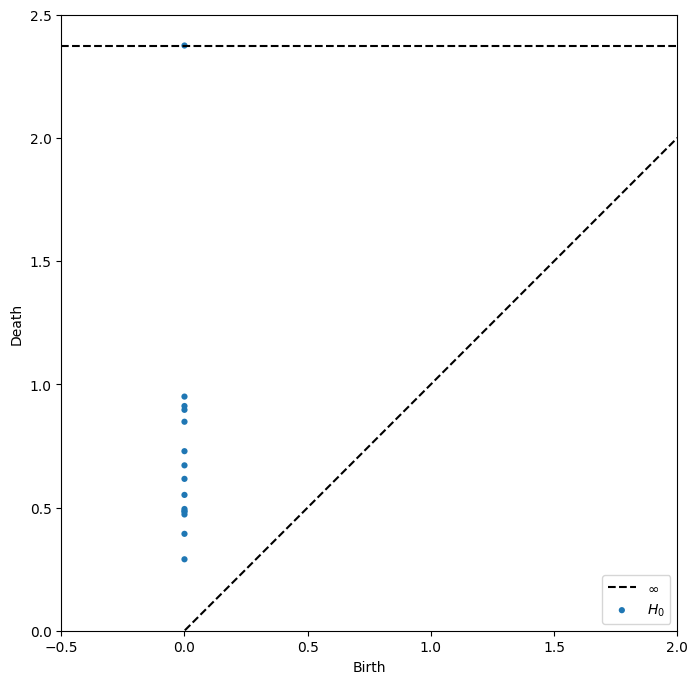

In [155]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgWOL_H0 = ripser(arrayPointsWOL)['dgms'][0]
plot_diagrams(dgWOL_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

## NEW - Newcastle United - 11

In [68]:
new = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/NEW.csv') 
new

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Targett,2,14,33,33,2873,1,13,6,0,10,1,884,40,24,23,3,0,91,75,9,0
1,2,A. Saint-Maximin,3,14,35,31,2809,5,64,26,0,150,5,515,50,22,48,6,0,19,13,7,0
2,3,C. Wood,4,14,34,32,2705,5,51,19,1,6,0,346,19,33,17,1,0,7,9,7,0
3,4,Joelinton,4,14,35,30,2558,4,45,14,0,37,1,707,29,64,33,8,0,72,72,7,0
4,5,D. Burn,2,14,29,28,2462,1,18,5,0,0,1,977,6,26,6,8,0,66,37,9,0
5,6,M. Dubravka,1,14,26,26,2340,0,0,0,0,0,0,447,2,0,5,1,0,1,1,8,73
6,7,F. Schar,2,14,25,25,2161,2,21,8,0,6,2,686,9,24,11,4,0,43,16,6,0
7,8,J. Lascelles,2,14,26,22,2055,1,17,4,0,1,0,515,4,17,4,5,0,29,15,3,0
8,9,J. Willock,3,14,29,24,2042,2,35,11,0,36,0,444,18,34,26,0,0,58,64,5,0
9,10,J. Shelvey,3,14,24,22,1985,2,30,14,0,9,1,731,16,18,8,5,1,39,30,6,0


In [69]:
features_names = new.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [70]:
scaler = MinMaxScaler()
new[features_names] = scaler.fit_transform(new[features_names])
new

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Targett,2,14,0.866667,1.00,1.000000,0.2,0.203125,0.230769,0.0,0.066667,0.2,0.864431,0.791667,0.375000,0.431818,0.375,0.0,1.000000,1.000000,1.000000,0.0
1,2,A. Saint-Maximin,3,14,1.000000,0.90,0.954738,1.0,1.000000,1.000000,0.0,1.000000,1.0,0.326531,1.000000,0.343750,1.000000,0.750,0.0,0.200000,0.162162,0.714286,0.0
2,3,C. Wood,4,14,0.933333,0.95,0.881188,1.0,0.796875,0.730769,1.0,0.040000,0.0,0.080175,0.354167,0.515625,0.295455,0.125,0.0,0.066667,0.108108,0.714286,0.0
3,4,Joelinton,4,14,1.000000,0.85,0.777228,0.8,0.703125,0.538462,0.0,0.246667,0.2,0.606414,0.562500,1.000000,0.659091,1.000,0.0,0.788889,0.959459,0.714286,0.0
4,5,D. Burn,2,14,0.600000,0.75,0.709335,0.2,0.281250,0.192308,0.0,0.000000,0.2,1.000000,0.083333,0.406250,0.045455,1.000,0.0,0.722222,0.486486,1.000000,0.0
5,6,M. Dubravka,1,14,0.400000,0.65,0.623055,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.227405,0.000000,0.000000,0.022727,0.125,0.0,0.000000,0.000000,0.857143,1.0
6,7,F. Schar,2,14,0.333333,0.60,0.496464,0.4,0.328125,0.307692,0.0,0.040000,0.4,0.575802,0.145833,0.375000,0.159091,0.500,0.0,0.466667,0.202703,0.571429,0.0
7,8,J. Lascelles,2,14,0.400000,0.45,0.421499,0.2,0.265625,0.153846,0.0,0.006667,0.0,0.326531,0.041667,0.265625,0.000000,0.625,0.0,0.311111,0.189189,0.142857,0.0
8,9,J. Willock,3,14,0.600000,0.55,0.412306,0.4,0.546875,0.423077,0.0,0.240000,0.0,0.223032,0.333333,0.531250,0.500000,0.000,0.0,0.633333,0.851351,0.428571,0.0
9,10,J. Shelvey,3,14,0.266667,0.45,0.371994,0.4,0.468750,0.538462,0.0,0.060000,0.2,0.641399,0.291667,0.281250,0.090909,0.625,1.0,0.422222,0.391892,0.571429,0.0


In [71]:
arrayPointsNEW = np.array(new[zestaw2])
#arrayPoints

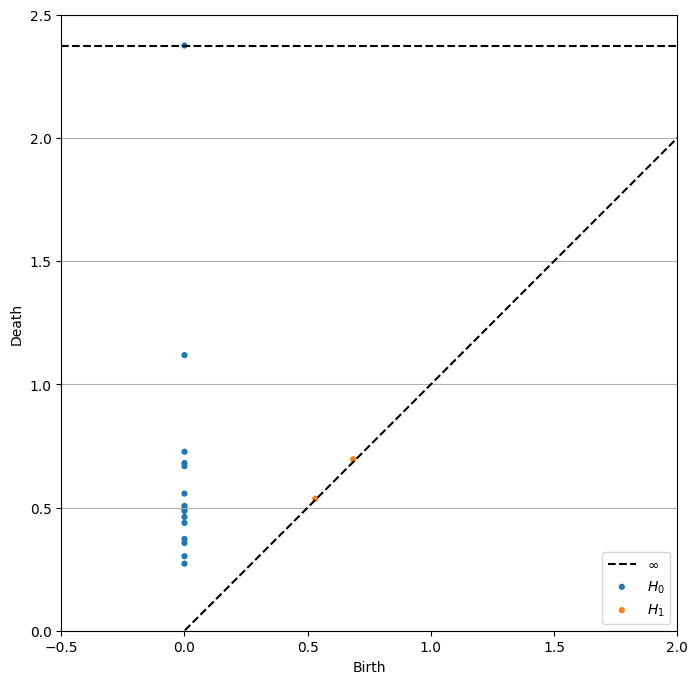

In [72]:
dgNEW = ripser(arrayPointsNEW)['dgms']
#plot_diagrams(dgNEW, show=True, xy_range=[-0.5,2,0,2.5]))
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgNEW, show=True, xy_range=[-0.5,2,0,2.5])

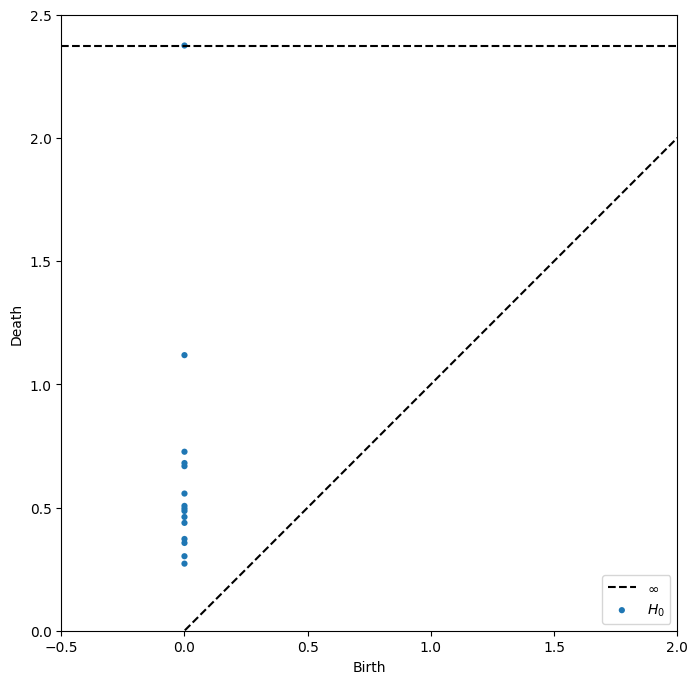

In [156]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgNEW_H0 = ripser(arrayPointsNEW)['dgms'][0]
plot_diagrams(dgNEW_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

## CRY -	Crystal Palace	- 12

In [74]:
cry = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/CRY.csv')
cry

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Guehi,2,7,36,36,3223,2,19,5,0,12,1,2052,6,14,34,4,0,47,35,11,0
1,2,T. Mitchell,2,7,36,35,3102,0,4,0,0,16,2,1074,21,16,14,1,0,98,104,10,0
2,3,J. Andersen,2,7,34,32,2915,0,8,3,0,7,3,1904,19,19,8,4,0,60,30,12,0
3,4,C. Gallagher,3,7,34,33,2851,8,52,22,0,43,3,852,38,65,65,10,0,66,68,11,0
4,5,W. Zaha,4,7,33,31,2761,14,69,32,5,75,1,726,46,37,101,4,1,25,40,11,0
5,6,Guaita,1,7,30,30,2655,0,0,0,0,0,0,597,0,1,2,2,0,1,1,11,84
6,7,J. Ward,2,7,28,27,2486,0,10,1,0,20,0,1144,7,22,21,8,0,58,44,9,0
7,8,J. Ayew,4,7,31,23,2023,3,35,8,0,34,3,559,23,38,66,2,0,45,47,6,0
8,9,C. Kouyate,2,7,27,23,1978,0,7,0,0,13,1,655,5,29,21,3,0,76,52,8,0
9,10,J. Schlupp,3,7,32,20,1846,4,33,9,0,35,1,489,18,26,22,1,0,43,46,7,0


In [75]:
features_names = cry.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [76]:
scaler = MinMaxScaler()
cry[features_names] = scaler.fit_transform(cry[features_names])
cry

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Guehi,2,7,1.000000,1.00,1.000000,0.142857,0.275362,0.15625,0.0,0.160000,0.2,1.000000,0.130435,0.203125,0.323232,0.333333,0.0,0.474227,0.330097,0.888889,0.0
1,2,T. Mitchell,2,7,1.000000,0.96,0.942022,0.000000,0.057971,0.00000,0.0,0.213333,0.4,0.484177,0.456522,0.234375,0.121212,0.000000,0.0,1.000000,1.000000,0.777778,0.0
2,3,J. Andersen,2,7,0.866667,0.84,0.852420,0.000000,0.115942,0.09375,0.0,0.093333,0.6,0.921941,0.413043,0.281250,0.060606,0.333333,0.0,0.608247,0.281553,1.000000,0.0
3,4,C. Gallagher,3,7,0.866667,0.88,0.821754,0.571429,0.753623,0.68750,0.0,0.573333,0.6,0.367089,0.826087,1.000000,0.636364,1.000000,0.0,0.670103,0.650485,0.888889,0.0
4,5,W. Zaha,4,7,0.800000,0.80,0.778630,1.000000,1.000000,1.00000,1.0,1.000000,0.2,0.300633,1.000000,0.562500,1.000000,0.333333,1.0,0.247423,0.378641,0.888889,0.0
5,6,Guaita,1,7,0.600000,0.76,0.727839,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.232595,0.000000,0.000000,0.000000,0.111111,0.0,0.000000,0.000000,0.888889,1.0
6,7,J. Ward,2,7,0.466667,0.64,0.646862,0.000000,0.144928,0.03125,0.0,0.266667,0.0,0.521097,0.152174,0.328125,0.191919,0.777778,0.0,0.587629,0.417476,0.666667,0.0
7,8,J. Ayew,4,7,0.666667,0.48,0.425012,0.214286,0.507246,0.25000,0.0,0.453333,0.6,0.212553,0.500000,0.578125,0.646465,0.111111,0.0,0.453608,0.446602,0.333333,0.0
8,9,C. Kouyate,2,7,0.400000,0.48,0.403450,0.000000,0.101449,0.00000,0.0,0.173333,0.2,0.263186,0.108696,0.437500,0.191919,0.222222,0.0,0.773196,0.495146,0.555556,0.0
9,10,J. Schlupp,3,7,0.733333,0.36,0.340201,0.285714,0.478261,0.28125,0.0,0.466667,0.2,0.175633,0.391304,0.390625,0.202020,0.000000,0.0,0.432990,0.436893,0.444444,0.0


In [77]:
arrayPointsCRY = np.array(cry[zestaw2])
#arrayPoints

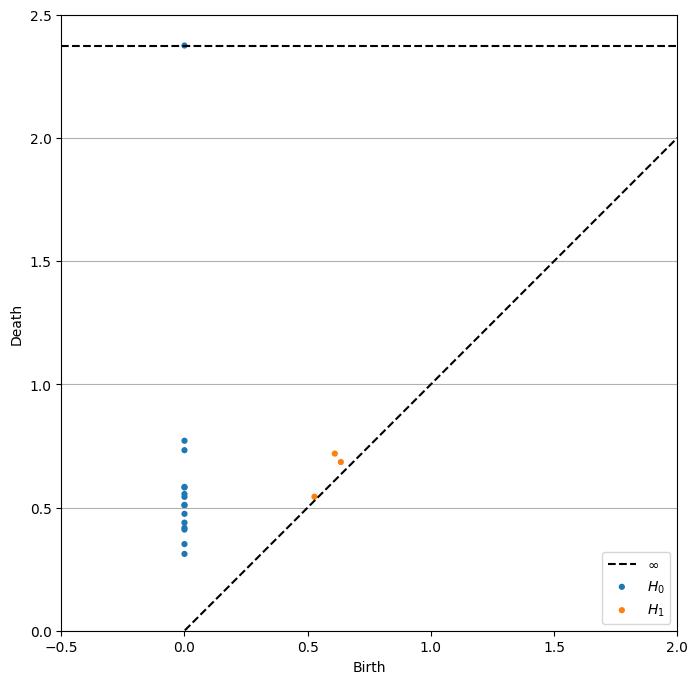

In [78]:
dgCRY = ripser(arrayPointsCRY)['dgms']
#plot_diagrams(dgCRY, show=True, xy_range=[-0.5,2,0,2.5]))
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgCRY, show=True, xy_range=[-0.5,2,0,2.5])

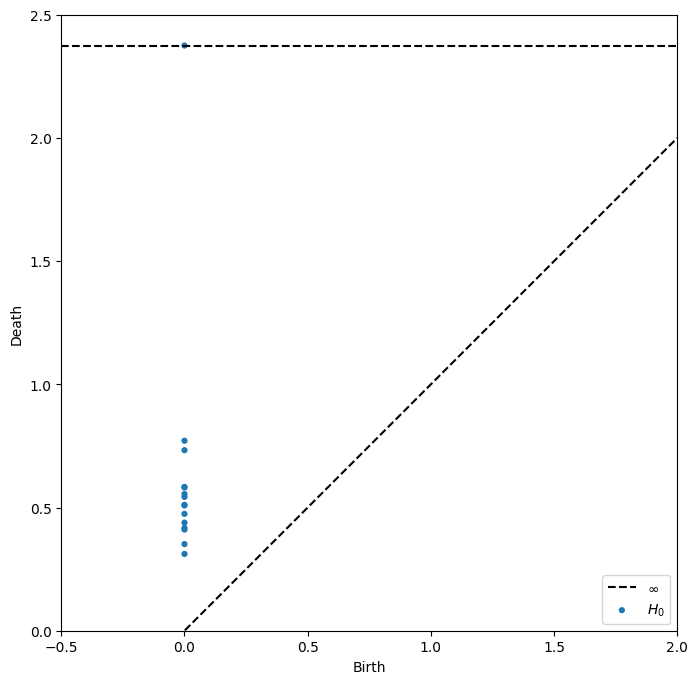

In [157]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgCRY_H0 = ripser(arrayPointsCRY)['dgms'][0]
plot_diagrams(dgCRY_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##BRE - Brentford - 13

In [80]:
bre = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/BRE.csv')
bre

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,P. Jansson,2,3,37,37,3322,3,22,11,0,2,1,1205,5,15,8,7,0,73,40,8,0
1,2,C. Norgaard,3,3,35,35,3059,3,27,9,0,18,4,1331,29,56,33,8,0,124,109,8,0
2,3,B. Mbeumo,3,3,35,34,2915,4,77,22,1,39,7,504,34,20,38,4,0,27,28,9,0
3,4,I. Toney,4,3,33,32,2908,12,88,30,5,24,5,431,43,50,80,8,0,35,33,8,0
4,5,R. Henry,2,3,34,33,2784,3,14,5,0,27,0,761,18,20,27,2,0,46,28,9,0
5,6,E. Pinnock,2,3,32,32,2697,1,16,9,0,9,1,1067,11,9,14,1,0,79,51,7,0
6,7,V. Janelt,3,3,31,27,2307,4,30,11,0,13,0,740,23,26,25,3,0,60,61,8,0
7,8,David Raya,1,3,24,24,2160,0,0,0,0,0,0,619,1,1,2,1,0,0,0,8,78
8,9,Sergi Canos,3,3,31,25,2094,3,33,13,0,23,2,420,17,28,15,6,1,47,56,6,0
9,10,K. Ajer,2,3,24,23,1987,1,7,1,0,13,3,504,8,12,16,5,0,44,29,7,0


In [81]:
features_names = bre.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [82]:
scaler = MinMaxScaler()
bre[features_names] = scaler.fit_transform(bre[features_names])
bre

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,P. Jansson,2,3,1.00,1.00,1.000000,0.250000,0.250000,0.366667,0.0,0.051282,0.142857,0.889956,0.116279,0.267857,0.076923,0.875,0.0,0.588710,0.366972,0.875,0.000000
1,2,C. Norgaard,3,3,0.92,0.92,0.884243,0.250000,0.306818,0.300000,0.0,0.461538,0.571429,1.000000,0.674419,1.000000,0.397436,1.000,0.0,1.000000,1.000000,0.875,0.000000
2,3,B. Mbeumo,3,3,0.92,0.88,0.820863,0.333333,0.875000,0.733333,0.2,1.000000,1.000000,0.277729,0.790698,0.357143,0.461538,0.500,0.0,0.217742,0.256881,1.000,0.000000
3,4,I. Toney,4,3,0.84,0.80,0.817782,1.000000,1.000000,1.000000,1.0,0.615385,0.714286,0.213974,1.000000,0.892857,1.000000,1.000,0.0,0.282258,0.302752,0.875,0.000000
4,5,R. Henry,2,3,0.88,0.84,0.763204,0.250000,0.159091,0.166667,0.0,0.692308,0.000000,0.502183,0.418605,0.357143,0.320513,0.250,0.0,0.370968,0.256881,1.000,0.000000
5,6,E. Pinnock,2,3,0.80,0.80,0.724912,0.083333,0.181818,0.300000,0.0,0.230769,0.142857,0.769432,0.255814,0.160714,0.153846,0.125,0.0,0.637097,0.467890,0.750,0.000000
6,7,V. Janelt,3,3,0.76,0.60,0.553257,0.333333,0.340909,0.366667,0.0,0.333333,0.000000,0.483843,0.534884,0.464286,0.294872,0.375,0.0,0.483871,0.559633,0.875,0.000000
7,8,David Raya,1,3,0.48,0.48,0.488556,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.378166,0.023256,0.017857,0.000000,0.125,0.0,0.000000,0.000000,0.875,1.000000
8,9,Sergi Canos,3,3,0.76,0.52,0.459507,0.250000,0.375000,0.433333,0.0,0.589744,0.285714,0.204367,0.395349,0.500000,0.166667,0.750,1.0,0.379032,0.513761,0.625,0.000000
9,10,K. Ajer,2,3,0.48,0.44,0.412412,0.083333,0.079545,0.033333,0.0,0.333333,0.428571,0.277729,0.186047,0.214286,0.179487,0.625,0.0,0.354839,0.266055,0.750,0.000000


In [83]:
arrayPointsBRE = np.array(bre[zestaw2])
#arrayPoints

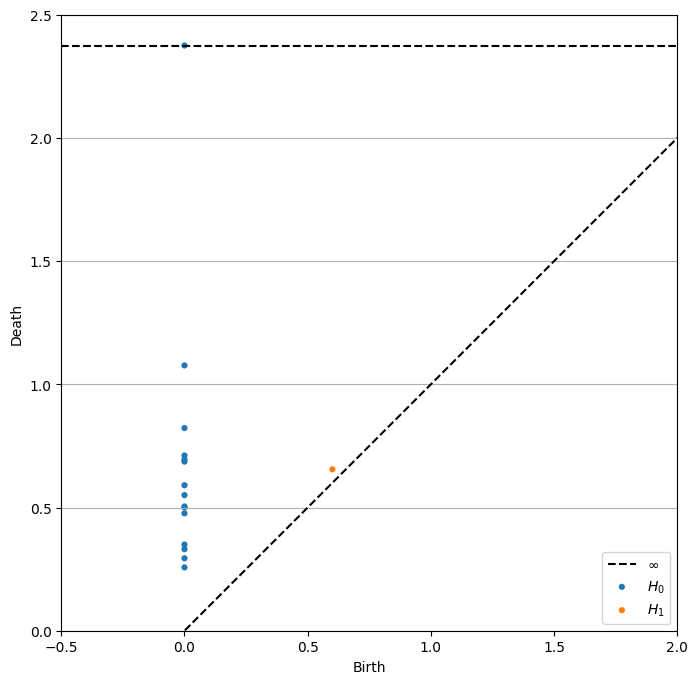

In [84]:
dgBRE = ripser(arrayPointsBRE)['dgms']
#plot_diagrams(dgBRE, show=True, xy_range=[-0.5,2,0,2.5]))
plt.grid(axis='y')
plt.rcParams['figure.figsize'] = [8,8]
plot_diagrams(dgBRE, show=True, xy_range=[-0.5,2,0,2.5])

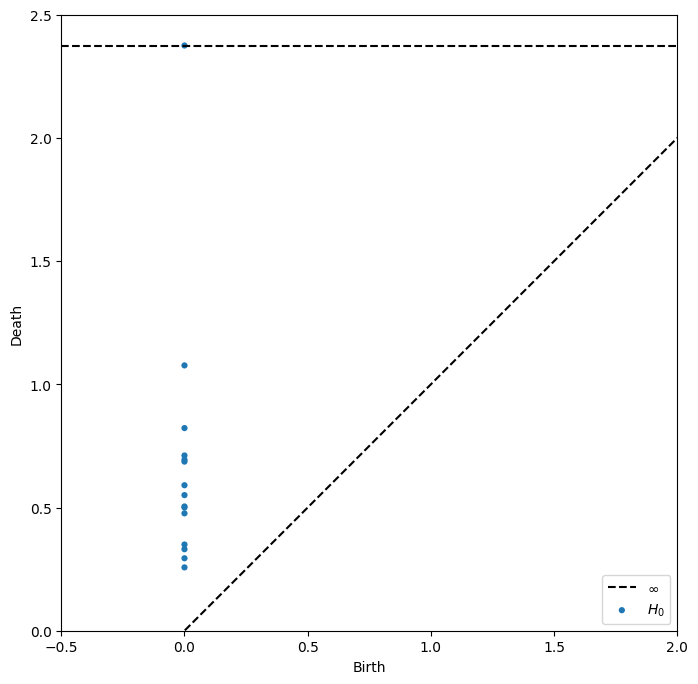

In [158]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgBRE_H0 = ripser(arrayPointsBRE)['dgms'][0]
plot_diagrams(dgBRE_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##AVL - Aston Villa - 14


In [86]:
avl = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/AVL.csv')
avl

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Cash,2,2,38,38,3380,4,37,13,0,33,3,883,28,38,38,8,0,98,88,11,0
1,2,E. Martinez,1,2,36,36,3240,0,0,0,0,0,0,659,0,0,3,4,0,1,1,11,95
2,3,T. Mings,2,2,36,35,3188,1,21,5,0,11,3,1316,10,27,24,11,0,58,23,11,0
3,4,J. McGinn,3,2,35,35,3092,3,43,16,0,44,4,986,51,57,80,8,0,99,106,10,0
4,5,O. Watkins,4,2,35,33,2955,11,77,32,1,37,2,479,35,32,39,7,0,25,17,10,0
5,6,Douglas Luiz,3,2,34,31,2721,2,23,8,0,24,3,1257,37,38,41,7,0,73,60,9,0
6,7,E. Konsa,2,2,29,29,2481,2,15,6,0,6,0,864,4,18,36,4,2,30,25,8,0
7,8,J. Ramsey,3,2,34,29,2476,6,34,11,0,30,1,882,21,32,44,6,0,68,67,11,0
8,9,L. Digne,2,2,29,29,2442,0,18,3,0,11,4,874,52,33,25,6,0,66,46,7,0
9,10,D. Ings,4,2,30,22,1904,7,49,18,1,10,6,250,15,16,12,4,0,22,23,7,0


In [87]:
features_names = avl.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [88]:
scaler = MinMaxScaler()
avl[features_names] = scaler.fit_transform(avl[features_names])
avl

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Cash,2,2,1.00,1.000000,1.000000,0.363636,0.480519,0.40625,0.0,0.750000,0.500000,0.593809,0.538462,0.666667,0.454545,0.727273,0.0,0.989796,0.828571,1.0,0.0
1,2,E. Martinez,1,2,0.92,0.928571,0.943434,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.383677,0.000000,0.000000,0.000000,0.363636,0.0,0.000000,0.000000,1.0,1.0
2,3,T. Mings,2,2,0.92,0.892857,0.922424,0.090909,0.272727,0.15625,0.0,0.250000,0.500000,1.000000,0.192308,0.473684,0.272727,1.000000,0.0,0.581633,0.209524,1.0,0.0
3,4,J. McGinn,3,2,0.88,0.892857,0.883636,0.272727,0.558442,0.50000,0.0,1.000000,0.666667,0.690432,0.980769,1.000000,1.000000,0.727273,0.0,1.000000,1.000000,0.9,0.0
4,5,O. Watkins,4,2,0.88,0.821429,0.828283,1.000000,1.000000,1.00000,1.0,0.840909,0.333333,0.214822,0.673077,0.561404,0.467532,0.636364,0.0,0.244898,0.152381,0.9,0.0
5,6,Douglas Luiz,3,2,0.84,0.750000,0.733737,0.181818,0.298701,0.25000,0.0,0.545455,0.500000,0.944653,0.711538,0.666667,0.493506,0.636364,0.0,0.734694,0.561905,0.8,0.0
6,7,E. Konsa,2,2,0.64,0.678571,0.636768,0.181818,0.194805,0.18750,0.0,0.136364,0.000000,0.575985,0.076923,0.315789,0.428571,0.363636,1.0,0.295918,0.228571,0.7,0.0
7,8,J. Ramsey,3,2,0.84,0.678571,0.634747,0.545455,0.441558,0.34375,0.0,0.681818,0.166667,0.592871,0.403846,0.561404,0.532468,0.545455,0.0,0.683673,0.628571,1.0,0.0
8,9,L. Digne,2,2,0.64,0.678571,0.621010,0.000000,0.233766,0.09375,0.0,0.250000,0.666667,0.585366,1.000000,0.578947,0.285714,0.545455,0.0,0.663265,0.428571,0.6,0.0
9,10,D. Ings,4,2,0.68,0.428571,0.403636,0.636364,0.636364,0.56250,1.0,0.227273,1.000000,0.000000,0.288462,0.280702,0.116883,0.363636,0.0,0.214286,0.209524,0.6,0.0


In [89]:
arrayPointsAVL = np.array(avl[zestaw2])
#arrayPoints

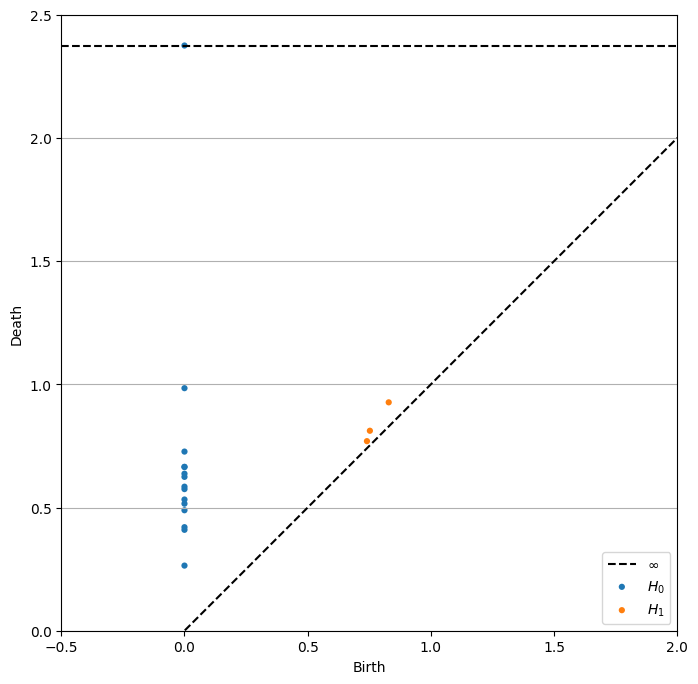

In [90]:
dgAVL = ripser(arrayPointsAVL)['dgms']
plt.grid(axis='y')
plot_diagrams(dgAVL, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]
#plot_diagrams(dgAVL, show=True, //xy_range=[-0.5,2,0,2.5]))

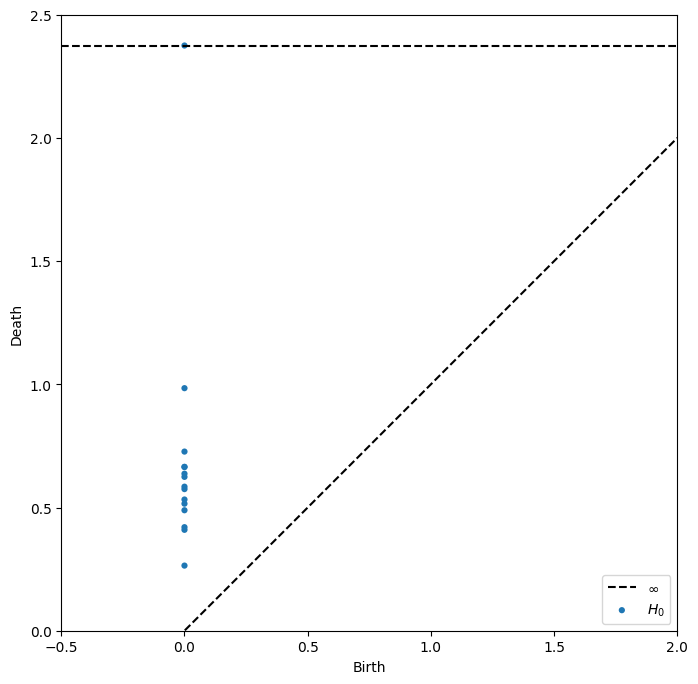

In [91]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgAVL_H0 = ripser(arrayPointsAVL)['dgms'][0]
plot_diagrams(dgAVL_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##SOU - Southampton - 15

In [92]:
sou = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/SOU.csv')
sou

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,J. Ward-Prowse,3,16,36,36,3217,10,55,24,4,12,5,1578,71,22,15,3,1,64,41,7,0
1,2,M. Salisu,2,16,34,33,2972,0,24,10,0,13,0,1356,9,38,7,8,1,125,80,6,0
2,3,Oriol Romeu,3,16,36,34,2895,2,24,4,0,30,2,1372,37,46,24,9,0,90,77,7,0
3,4,K. Walker-Peters,2,16,32,29,2632,1,26,7,0,64,2,885,24,27,47,5,0,70,57,6,0
4,5,J. Bednarek,2,16,31,30,2631,4,19,7,0,1,0,1181,6,30,15,10,0,87,32,7,0
5,6,V. Livramento,3,16,28,25,2203,1,12,3,0,30,1,712,20,12,36,2,0,75,54,7,0
6,7,M. Elyounoussi,3,16,30,23,2043,4,43,19,0,28,2,426,28,28,18,4,0,29,36,8,0
7,8,C. Adams,4,16,30,23,2041,7,49,24,0,20,3,303,26,29,40,0,0,13,13,5,0
8,9,A. Broja,4,16,32,21,1978,6,45,21,0,33,0,243,10,29,26,2,0,8,12,4,0
9,10,N. Redmond,3,16,27,20,1832,1,26,9,0,21,5,490,34,16,15,0,0,22,22,4,0


In [93]:
features_names = sou.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [94]:
scaler = MinMaxScaler()
sou[features_names] = scaler.fit_transform(sou[features_names])
sou

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,J. Ward-Prowse,3,16,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,0.187500,1.0,1.000000,1.000000,0.478261,0.319149,0.3,1.0,0.512,0.5125,0.8,0.000000
1,2,M. Salisu,2,16,0.894737,0.857143,0.864115,0.0,0.436364,0.416667,0.0,0.203125,0.0,0.835677,0.126761,0.826087,0.148936,0.8,1.0,1.000,1.0000,0.6,0.000000
2,3,Oriol Romeu,3,16,1.000000,0.904762,0.821409,0.2,0.436364,0.166667,0.0,0.468750,0.4,0.847520,0.521127,1.000000,0.510638,0.9,0.0,0.720,0.9625,0.8,0.000000
3,4,K. Walker-Peters,2,16,0.789474,0.666667,0.675541,0.1,0.472727,0.291667,0.0,1.000000,0.4,0.487047,0.338028,0.586957,1.000000,0.5,0.0,0.560,0.7125,0.6,0.000000
4,5,J. Bednarek,2,16,0.736842,0.714286,0.674986,0.4,0.345455,0.291667,0.0,0.015625,0.0,0.706144,0.084507,0.652174,0.319149,1.0,0.0,0.696,0.4000,0.8,0.000000
5,6,V. Livramento,3,16,0.578947,0.476190,0.437604,0.1,0.218182,0.125000,0.0,0.468750,0.2,0.358993,0.281690,0.260870,0.765957,0.2,0.0,0.600,0.6750,0.8,0.000000
6,7,M. Elyounoussi,3,16,0.684211,0.380952,0.348863,0.4,0.781818,0.791667,0.0,0.437500,0.4,0.147298,0.394366,0.608696,0.382979,0.4,0.0,0.232,0.4500,1.0,0.000000
7,8,C. Adams,4,16,0.684211,0.380952,0.347754,0.7,0.890909,1.000000,0.0,0.312500,0.6,0.056255,0.366197,0.630435,0.851064,0.0,0.0,0.104,0.1625,0.4,0.000000
8,9,A. Broja,4,16,0.789474,0.285714,0.312812,0.6,0.818182,0.875000,0.0,0.515625,0.0,0.011843,0.140845,0.630435,0.553191,0.2,0.0,0.064,0.1500,0.2,0.000000
9,10,N. Redmond,3,16,0.526316,0.238095,0.231836,0.1,0.472727,0.375000,0.0,0.328125,1.0,0.194671,0.478873,0.347826,0.319149,0.0,0.0,0.176,0.2750,0.2,0.000000


In [95]:
arrayPointsSOU = np.array(sou[zestaw2])
#arrayPoints

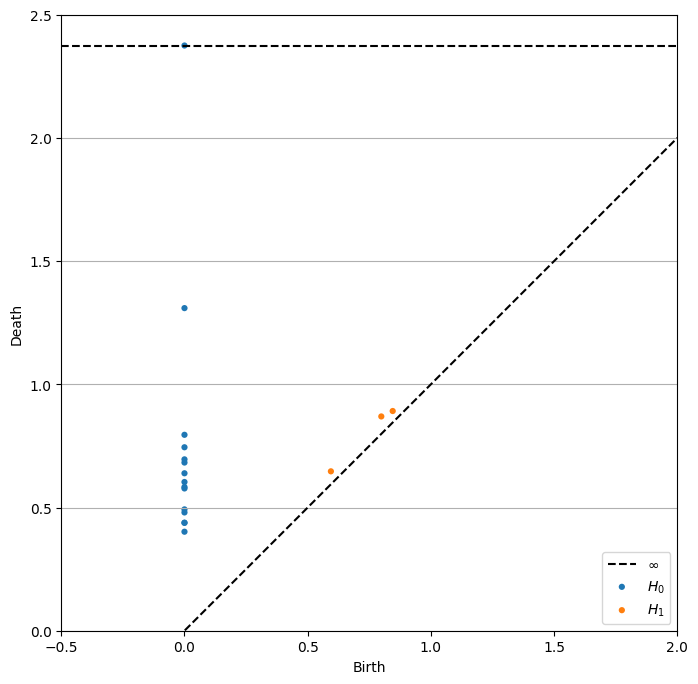

In [96]:
dgSOU = ripser(arrayPointsSOU)['dgms']
plt.grid(axis='y')
plot_diagrams(dgSOU, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]
#plot_diagrams(dgSOU, show=True, //xy_range=[-0.5,2,0,2.5]))

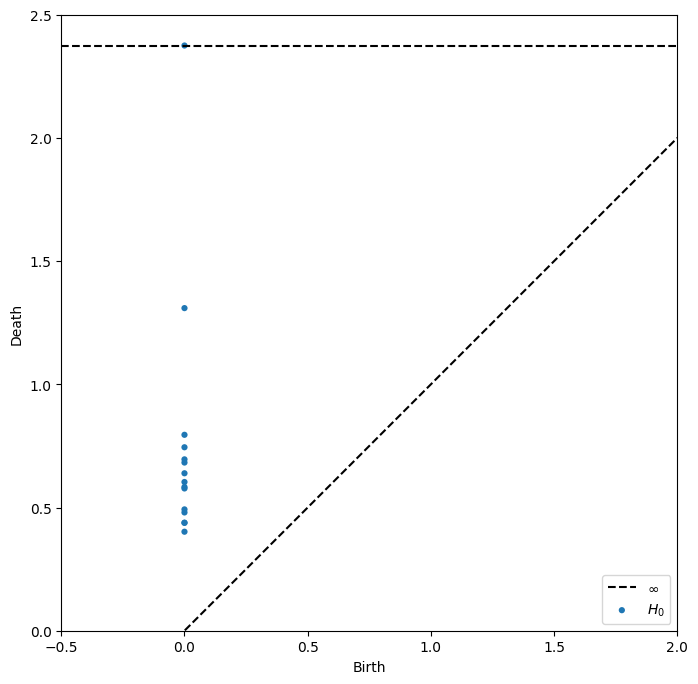

In [97]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgSOU_H0 = ripser(arrayPointsSOU)['dgms'][0]
plot_diagrams(dgSOU_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##EVE - Everton - 16

In [98]:
eve = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/EVE.csv')
eve

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,J. Pickford,1,8,35,35,3150,0,0,0,0,1,0,491,4,0,6,2,0,2,1,7,117
1,2,M. Keane,2,8,32,31,2792,3,20,6,0,7,2,927,8,16,7,2,1,87,46,7,0
2,3,S. Coleman,2,8,30,30,2658,1,8,1,0,34,0,706,13,14,17,4,0,68,61,7,0
3,4,A. Doucoure,3,8,30,29,2538,2,34,11,0,21,4,861,19,39,16,6,0,71,75,5,0
4,5,Richarlison,4,8,30,28,2526,10,72,23,3,40,5,331,29,36,68,9,0,35,40,7,0
5,6,D. Gray,3,8,34,28,2347,5,65,17,0,55,4,515,42,12,32,3,0,34,30,6,0
6,7,A. Gordon,3,8,35,25,2284,4,44,18,0,38,2,455,35,25,64,4,0,54,54,6,0
7,8,Allan,3,8,28,25,2186,0,7,3,0,21,2,766,15,30,22,7,1,67,74,6,0
8,9,M. Holgate,2,8,25,23,2133,2,7,3,0,2,1,577,3,26,15,7,1,44,35,5,0
9,10,A. Iwobi,3,8,28,22,2037,2,24,6,0,32,2,554,36,16,6,1,0,39,40,6,0


In [99]:
features_names = eve.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [100]:
scaler = MinMaxScaler()
eve[features_names] = scaler.fit_transform(eve[features_names])
eve

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,J. Pickford,1,8,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.427070,0.025641,0.000000,0.000000,0.222222,0.0,0.000000,0.000000,1.000000,1.0
1,2,M. Keane,2,8,0.863636,0.833333,0.832161,0.3,0.277778,0.260870,0.000000,0.111111,0.4,1.000000,0.128205,0.410256,0.016129,0.222222,1.0,1.000000,0.608108,1.000000,0.0
2,3,S. Coleman,2,8,0.772727,0.791667,0.769339,0.1,0.111111,0.043478,0.000000,0.611111,0.0,0.709593,0.256410,0.358974,0.177419,0.444444,0.0,0.776471,0.810811,1.000000,0.0
3,4,A. Doucoure,3,8,0.772727,0.750000,0.713080,0.2,0.472222,0.478261,0.000000,0.370370,0.8,0.913272,0.410256,1.000000,0.161290,0.666667,0.0,0.811765,1.000000,0.666667,0.0
4,5,Richarlison,4,8,0.772727,0.708333,0.707454,1.0,1.000000,1.000000,1.000000,0.722222,1.0,0.216820,0.666667,0.923077,1.000000,1.000000,0.0,0.388235,0.527027,1.000000,0.0
5,6,D. Gray,3,8,0.954545,0.708333,0.623535,0.5,0.902778,0.739130,0.000000,1.000000,0.8,0.458607,1.000000,0.307692,0.419355,0.333333,0.0,0.376471,0.391892,0.833333,0.0
6,7,A. Gordon,3,8,1.000000,0.583333,0.593999,0.4,0.611111,0.782609,0.000000,0.685185,0.4,0.379763,0.820513,0.641026,0.935484,0.444444,0.0,0.611765,0.716216,0.833333,0.0
7,8,Allan,3,8,0.681818,0.583333,0.548054,0.0,0.097222,0.130435,0.000000,0.370370,0.4,0.788436,0.307692,0.769231,0.258065,0.777778,1.0,0.764706,0.986486,0.833333,0.0
8,9,M. Holgate,2,8,0.545455,0.500000,0.523207,0.2,0.097222,0.130435,0.000000,0.018519,0.2,0.540079,0.000000,0.666667,0.145161,0.777778,1.0,0.494118,0.459459,0.666667,0.0
9,10,A. Iwobi,3,8,0.681818,0.458333,0.478200,0.2,0.333333,0.260870,0.000000,0.574074,0.4,0.509855,0.846154,0.410256,0.000000,0.111111,0.0,0.435294,0.527027,0.833333,0.0


In [101]:
arrayPointsEVE = np.array(eve[zestaw2])
#arrayPoints

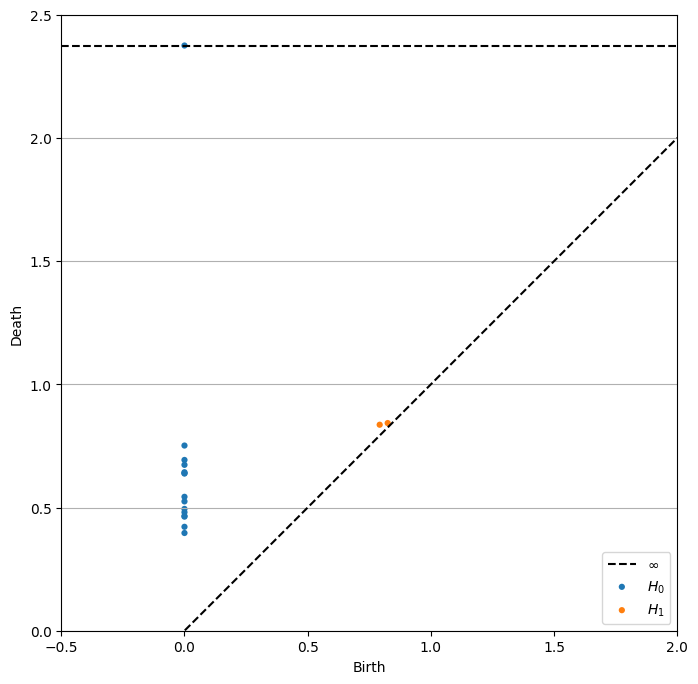

In [102]:
dgEVE = ripser(arrayPointsEVE)['dgms']
plt.grid(axis='y')
plot_diagrams(dgEVE, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]
#plot_diagrams(dgEVE, show=True, //xy_range=[-0.5,2,0,2.5]))

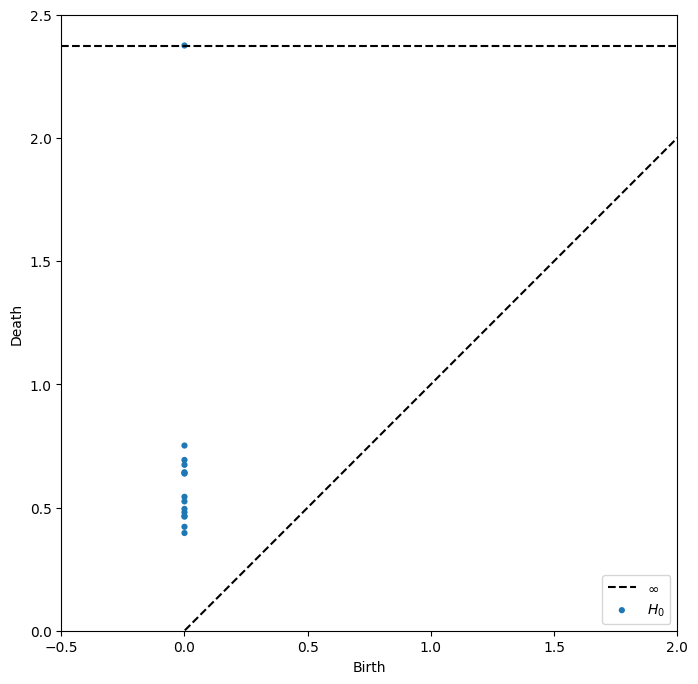

In [103]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgEVE_H0 = ripser(arrayPointsEVE)['dgms'][0]
plot_diagrams(dgEVE_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##LEE - Leeds United - 17

In [104]:
lee = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/LEE.csv')
lee

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,I. Meslier,1,9,38,38,3385,0,0,0,0,2,0,769,0,0,5,2,0,1,1,5,143
1,2,S. Dallas,2,9,34,34,2922,1,30,9,0,29,1,1066,31,33,30,5,0,112,93,5,0
2,3,Raphinha,3,9,35,34,2922,11,88,25,4,62,3,744,65,40,47,7,0,58,51,5,0
3,4,J. Harrison,3,9,35,32,2648,8,43,17,0,54,1,613,42,29,23,3,0,58,57,3,0
4,5,D. James,3,9,34,31,2500,4,54,18,0,21,4,336,27,31,38,7,1,23,26,4,0
5,6,Diego Llorente,2,9,28,28,2343,3,10,3,0,8,0,1105,2,23,21,7,0,71,53,5,0
6,7,L. Ayling,2,9,26,26,2275,2,19,4,0,23,2,1098,12,22,19,4,1,70,74,2,0
7,8,Rodrigo,4,9,31,27,2270,6,47,18,1,22,1,658,38,21,30,9,0,20,20,4,0
8,9,M. Klich,3,9,33,26,2079,1,42,18,0,20,2,781,31,40,15,5,0,36,47,1,0
9,10,P. Struijk,2,9,29,22,2051,1,11,4,0,2,0,1068,11,25,8,6,1,72,61,0,0


In [105]:
features_names = lee.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [106]:
scaler = MinMaxScaler()
lee[features_names] = scaler.fit_transform(lee[features_names])
lee

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,I. Meslier,1,9,1.000000,1.000000,1.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.563069,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0
1,2,S. Dallas,2,9,0.777778,0.809524,0.750539,0.090909,0.340909,0.36,0.00,0.450000,0.25,0.949285,0.476923,0.825,0.595238,0.333333,0.0,1.000000,1.000000,1.0,0.0
2,3,Raphinha,3,9,0.833333,0.809524,0.750539,1.000000,1.000000,1.00,1.00,1.000000,0.75,0.530559,1.000000,1.000,1.000000,0.555556,0.0,0.513514,0.543478,1.0,0.0
3,4,J. Harrison,3,9,0.833333,0.714286,0.602909,0.727273,0.488636,0.68,0.00,0.866667,0.25,0.360208,0.646154,0.725,0.428571,0.111111,0.0,0.513514,0.608696,0.6,0.0
4,5,D. James,3,9,0.777778,0.666667,0.523168,0.363636,0.613636,0.72,0.00,0.316667,1.00,0.000000,0.415385,0.775,0.785714,0.555556,1.0,0.198198,0.271739,0.8,0.0
5,6,Diego Llorente,2,9,0.444444,0.523810,0.438578,0.272727,0.113636,0.12,0.00,0.100000,0.00,1.000000,0.030769,0.575,0.380952,0.555556,0.0,0.630631,0.565217,1.0,0.0
6,7,L. Ayling,2,9,0.333333,0.428571,0.401940,0.181818,0.215909,0.16,0.00,0.350000,0.50,0.990897,0.184615,0.550,0.333333,0.222222,1.0,0.621622,0.793478,0.4,0.0
7,8,Rodrigo,4,9,0.611111,0.476190,0.399246,0.545455,0.534091,0.72,0.25,0.333333,0.25,0.418726,0.584615,0.525,0.595238,0.777778,0.0,0.171171,0.206522,0.8,0.0
8,9,M. Klich,3,9,0.722222,0.428571,0.296336,0.090909,0.477273,0.72,0.00,0.300000,0.50,0.578674,0.476923,1.000,0.238095,0.333333,0.0,0.315315,0.500000,0.2,0.0
9,10,P. Struijk,2,9,0.500000,0.238095,0.281250,0.090909,0.125000,0.16,0.00,0.000000,0.00,0.951886,0.169231,0.625,0.071429,0.444444,1.0,0.639640,0.652174,0.0,0.0


In [107]:
arrayPointsLEE = np.array(lee[zestaw2])
#arrayPoints

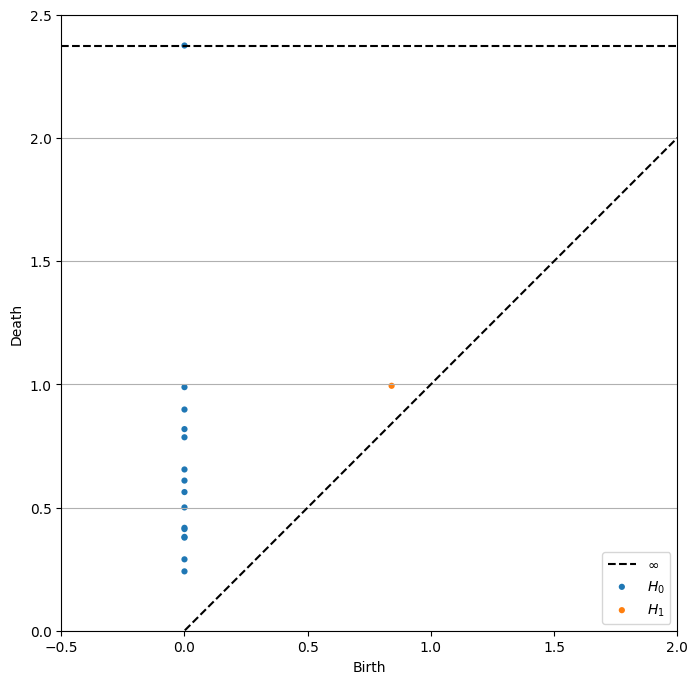

In [108]:
dgLEE = ripser(arrayPointsLEE)['dgms']
plt.grid(axis='y')
plot_diagrams(dgLEE, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]
#plot_diagrams(dgLEE, show=True, //xy_range=[-0.5,2,0,2.5]))

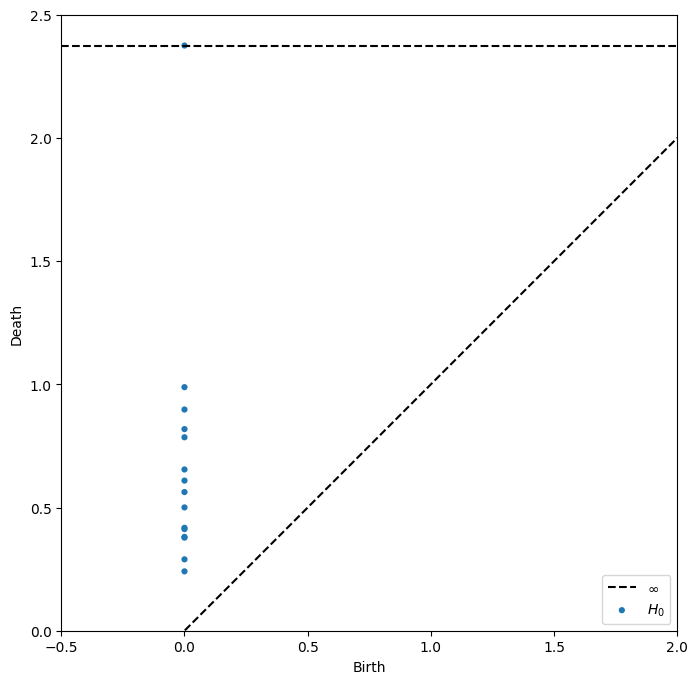

In [109]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgLEE_H0 = ripser(arrayPointsLEE)['dgms'][0]
plot_diagrams(dgLEE_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##BRN - Burnley - 18

In [110]:
brn = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/BRN.csv')
brn

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,N. Pope,1,5,36,36,3240,0,0,0,0,0,0,413,2,0,2,1,0,2,0,9,121
1,2,D. McNeil,3,5,38,35,3112,0,52,15,0,90,1,730,47,16,36,1,0,84,78,9,0
2,3,J. Tarkowski,2,5,35,35,3107,1,22,6,0,5,2,812,10,30,19,11,0,93,64,7,0
3,4,J. Brownhill,3,5,35,32,2953,2,29,9,0,15,3,870,40,39,20,10,0,105,73,7,0
4,5,C. Taylor,2,5,31,30,2730,0,7,0,0,27,3,697,21,17,43,3,0,84,45,5,0
5,6,A. Westwood,3,5,27,26,2289,0,14,2,0,10,3,837,33,29,22,7,0,42,21,4,0
6,7,B. Mee,2,5,21,21,1840,3,19,4,0,4,0,529,5,9,7,3,0,36,26,6,0
7,8,M. Cornet,2,5,26,21,1776,9,47,22,0,13,1,266,15,20,20,2,0,19,16,3,0
8,9,M. Lowton,2,5,25,20,1771,1,10,2,0,10,2,437,18,13,6,3,1,50,38,3,0
9,10,C. Roberts,2,5,21,19,1691,1,6,4,0,6,1,471,13,7,29,2,0,35,20,6,0


In [111]:
features_names = brn.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [112]:
scaler = MinMaxScaler()
brn[features_names] = scaler.fit_transform(brn[features_names])
brn

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,N. Pope,1,5,0.894737,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.336720,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.0
1,2,D. McNeil,3,5,1.000000,0.956522,0.931404,0.000000,1.000000,0.681818,0.0,1.000000,0.333333,0.796807,1.000000,0.410256,0.829268,0.0,0.0,0.796117,1.000000,1.000000,0.0
2,3,J. Tarkowski,2,5,0.842105,0.956522,0.928725,0.111111,0.423077,0.272727,0.0,0.055556,0.666667,0.915820,0.177778,0.769231,0.414634,1.0,0.0,0.883495,0.820513,0.666667,0.0
3,4,J. Brownhill,3,5,0.842105,0.826087,0.846195,0.222222,0.557692,0.409091,0.0,0.166667,1.000000,1.000000,0.844444,1.000000,0.439024,0.9,0.0,1.000000,0.935897,0.666667,0.0
4,5,C. Taylor,2,5,0.631579,0.739130,0.726688,0.000000,0.134615,0.000000,0.0,0.300000,1.000000,0.748911,0.422222,0.435897,1.000000,0.2,0.0,0.796117,0.576923,0.333333,0.0
5,6,A. Westwood,3,5,0.421053,0.565217,0.490354,0.000000,0.269231,0.090909,0.0,0.111111,1.000000,0.952104,0.688889,0.743590,0.487805,0.6,0.0,0.388350,0.269231,0.166667,0.0
6,7,B. Mee,2,5,0.105263,0.347826,0.249732,0.333333,0.365385,0.181818,0.0,0.044444,0.000000,0.505080,0.066667,0.230769,0.121951,0.2,0.0,0.330097,0.333333,0.500000,0.0
7,8,M. Cornet,2,5,0.368421,0.347826,0.215434,1.000000,0.903846,1.000000,0.0,0.144444,0.333333,0.123367,0.288889,0.512821,0.439024,0.1,0.0,0.165049,0.205128,0.000000,0.0
8,9,M. Lowton,2,5,0.315789,0.304348,0.212755,0.111111,0.192308,0.090909,0.0,0.111111,0.666667,0.371553,0.355556,0.333333,0.097561,0.2,1.0,0.466019,0.487179,0.000000,0.0
9,10,C. Roberts,2,5,0.105263,0.260870,0.169882,0.111111,0.115385,0.181818,0.0,0.066667,0.333333,0.420900,0.244444,0.179487,0.658537,0.1,0.0,0.320388,0.256410,0.500000,0.0


In [113]:
arrayPointsBRN = np.array(brn[zestaw2])
#arrayPoints

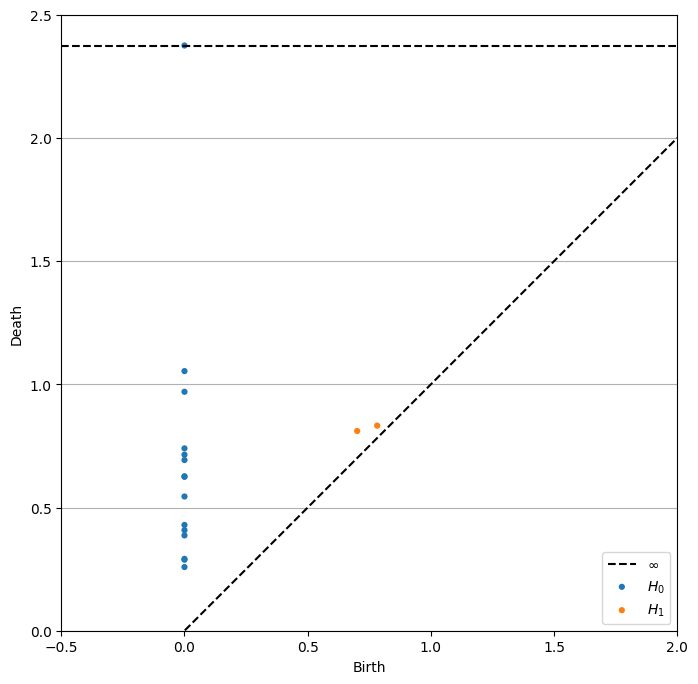

In [114]:
dgBRN = ripser(arrayPointsBRN)['dgms']
plt.grid(axis='y')
plot_diagrams(dgBRN, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]
#plot_diagrams(dgBRN, show=True, //xy_range=[-0.5,2,0,2.5]))

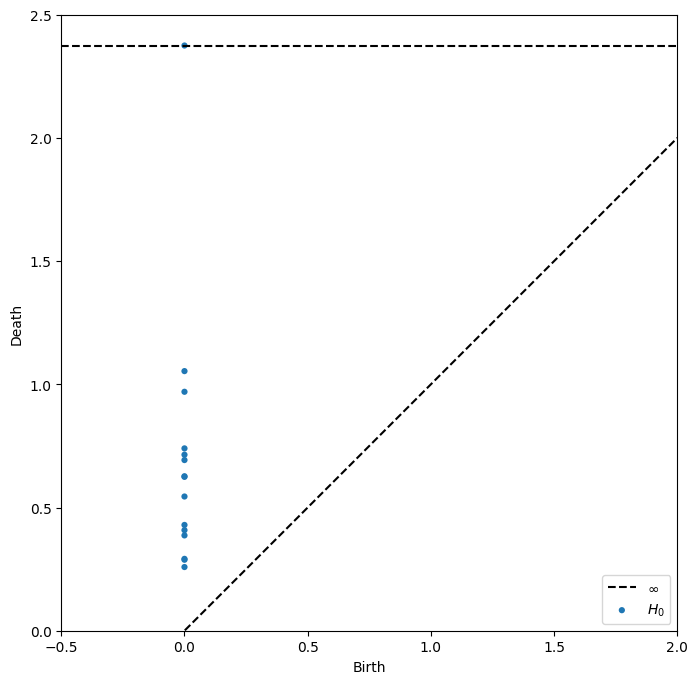

In [115]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgBRN_H0 = ripser(arrayPointsBRN)['dgms'][0]
plot_diagrams(dgBRN_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

## WAT - Watford - 19

In [116]:
wat = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/WAT.csv')
wat

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Sissoko,3,18,36,36,3221,2,25,8,0,52,1,896,36,36,11,5,0,57,53,4,0
1,2,E. Dennis,4,18,33,30,2589,10,60,26,0,68,6,393,33,59,40,7,1,50,51,2,0
2,3,C. Cathcart,2,18,31,27,2395,0,3,0,0,0,1,734,3,13,4,3,0,43,32,3,0
3,4,B. Foster,1,18,26,26,2340,0,0,0,0,1,1,354,1,1,3,0,0,0,0,4,70
4,5,J. King,4,18,32,27,2249,5,50,17,1,30,3,364,35,42,21,5,0,23,19,3,0
5,6,Kiko Femenia,2,18,27,26,2149,0,3,1,0,7,5,646,25,12,13,2,0,59,35,2,0
6,7,J. Kucka,3,18,26,22,1923,1,46,11,0,17,1,466,10,46,49,3,1,66,59,1,0
7,8,I. Sarr,3,18,22,21,1864,5,39,17,0,34,2,321,21,17,47,2,0,16,12,2,0
8,9,Joao Pedro,4,18,28,15,1638,3,47,16,0,62,1,383,19,13,30,1,0,29,20,2,0
9,10,H. Kamara,2,18,19,18,1625,1,5,1,0,15,0,499,10,24,16,3,1,103,53,3,0


In [117]:
features_names = wat.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [118]:
scaler = MinMaxScaler()
wat[features_names] = scaler.fit_transform(wat[features_names])
wat

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Sissoko,3,18,1.00,1.00,1.000000,0.2,0.416667,0.307692,0.0,0.764706,0.166667,1.000000,1.000000,0.603448,0.191489,0.714286,0.0,0.553398,0.898305,1.00,0.0
1,2,E. Dennis,4,18,0.85,0.76,0.696300,1.0,1.000000,1.000000,0.0,1.000000,1.000000,0.254815,0.914286,1.000000,0.808511,1.000000,1.0,0.485437,0.864407,0.50,0.0
2,3,C. Cathcart,2,18,0.75,0.64,0.603075,0.0,0.050000,0.000000,0.0,0.000000,0.166667,0.760000,0.057143,0.206897,0.042553,0.428571,0.0,0.417476,0.542373,0.75,0.0
3,4,B. Foster,1,18,0.50,0.60,0.576646,0.0,0.000000,0.000000,0.0,0.014706,0.166667,0.197037,0.000000,0.000000,0.021277,0.000000,0.0,0.000000,0.000000,1.00,1.0
4,5,J. King,4,18,0.80,0.64,0.532917,0.5,0.833333,0.653846,1.0,0.441176,0.500000,0.211852,0.971429,0.706897,0.404255,0.714286,0.0,0.223301,0.322034,0.75,0.0
5,6,Kiko Femenia,2,18,0.55,0.60,0.484863,0.0,0.050000,0.038462,0.0,0.102941,0.833333,0.629630,0.685714,0.189655,0.234043,0.285714,0.0,0.572816,0.593220,0.50,0.0
6,7,J. Kucka,3,18,0.50,0.44,0.376261,0.1,0.766667,0.423077,0.0,0.250000,0.166667,0.362963,0.257143,0.775862,1.000000,0.428571,1.0,0.640777,1.000000,0.25,0.0
7,8,I. Sarr,3,18,0.30,0.40,0.347910,0.5,0.650000,0.653846,0.0,0.500000,0.333333,0.148148,0.571429,0.275862,0.957447,0.285714,0.0,0.155340,0.203390,0.50,0.0
8,9,Joao Pedro,4,18,0.60,0.16,0.239308,0.3,0.783333,0.615385,0.0,0.911765,0.166667,0.240000,0.514286,0.206897,0.595745,0.142857,0.0,0.281553,0.338983,0.50,0.0
9,10,H. Kamara,2,18,0.15,0.28,0.233061,0.1,0.083333,0.038462,0.0,0.220588,0.000000,0.411852,0.257143,0.396552,0.297872,0.428571,1.0,1.000000,0.898305,0.75,0.0


In [119]:
arrayPointsWAT = np.array(wat[zestaw2])
#arrayPoints

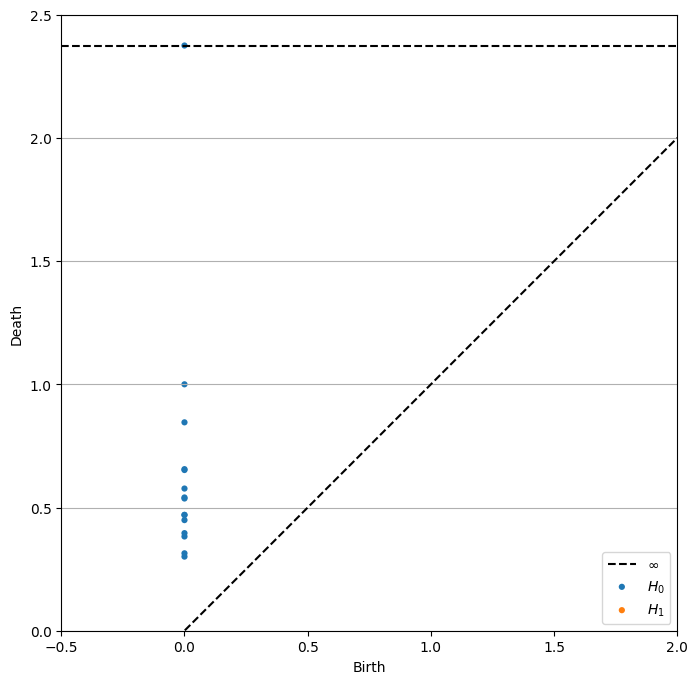

In [120]:
dgWAT = ripser(arrayPointsWAT)['dgms']
plt.grid(axis='y')
plot_diagrams(dgWAT, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]
#plot_diagrams(dgWAT, show=True, //xy_range=[-0.5,2,0,2.5]))

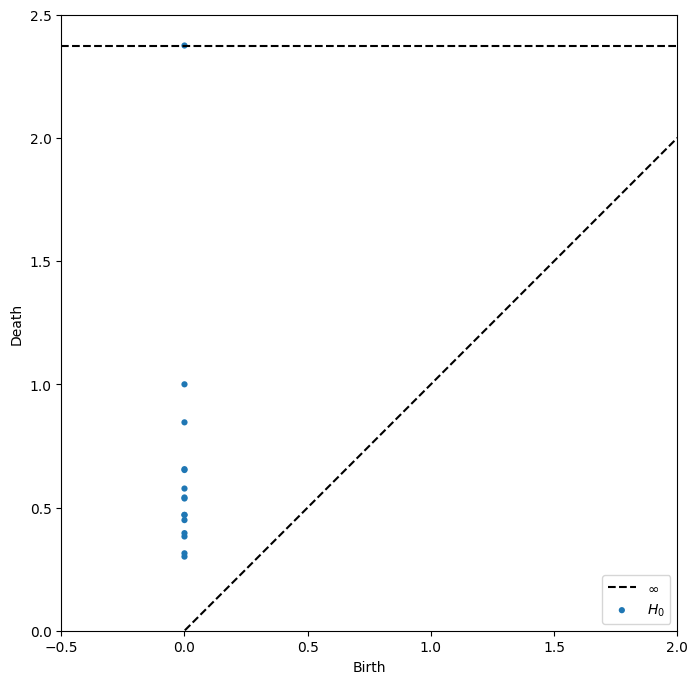

In [121]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgWAT_H0 = ripser(arrayPointsWAT)['dgms'][0]
plot_diagrams(dgWAT_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

##NOR - Norwich City - 20

In [122]:
nor = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet1/NOR.csv')
nor

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,T. Pukki,4,15,37,37,3260,11,71,27,3,27,3,394,27,31,25,4,0,15,23,6,0
1,2,G. Hanley,2,15,33,33,2899,1,20,4,0,1,0,1089,6,22,22,2,0,81,44,6,0
2,3,M. Aarons,2,15,34,32,2882,0,13,2,0,34,2,847,20,27,52,8,0,72,64,4,0
3,4,K. McLean,3,15,31,29,2706,1,33,6,0,19,0,771,10,16,38,3,0,56,42,6,0
4,5,T. Krul,1,15,29,29,2610,0,0,0,0,0,0,591,1,0,0,1,0,1,1,5,106
5,6,B. Gibson,2,15,28,28,2495,0,8,4,0,5,0,1111,3,12,9,3,1,43,23,6,0
6,7,P. Lees Melou,3,15,33,27,2270,1,33,9,0,19,0,788,25,35,23,5,0,61,58,5,0
7,8,M. Rashica,4,15,31,25,2236,1,44,17,0,16,2,325,36,23,47,0,0,34,31,4,0
8,9,B. Williams,2,15,26,23,2123,0,4,1,0,20,1,764,21,23,44,8,0,81,55,2,0
9,10,B. Gilmour,3,15,24,21,1858,0,18,3,0,15,1,949,25,28,22,2,0,38,41,2,0


In [123]:
features_names = nor.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [124]:
scaler = MinMaxScaler()
nor[features_names] = scaler.fit_transform(nor[features_names])
nor

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,T. Pukki,4,15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.794118,1.000000,0.130909,0.742857,0.837838,0.480769,0.500,0.0,0.1750,0.349206,1.00,0.0
1,2,G. Hanley,2,15,0.846154,0.846154,0.845462,0.090909,0.281690,0.148148,0.0,0.029412,0.000000,0.973333,0.142857,0.594595,0.423077,0.250,0.0,1.0000,0.682540,1.00,0.0
2,3,M. Aarons,2,15,0.884615,0.807692,0.838185,0.000000,0.183099,0.074074,0.0,1.000000,0.666667,0.680000,0.542857,0.729730,1.000000,1.000,0.0,0.8875,1.000000,0.50,0.0
3,4,K. McLean,3,15,0.769231,0.692308,0.762842,0.090909,0.464789,0.222222,0.0,0.558824,0.000000,0.587879,0.257143,0.432432,0.730769,0.375,0.0,0.6875,0.650794,1.00,0.0
4,5,T. Krul,1,15,0.692308,0.692308,0.721747,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.369697,0.000000,0.000000,0.000000,0.125,0.0,0.0000,0.000000,0.75,1.0
5,6,B. Gibson,2,15,0.653846,0.653846,0.672517,0.000000,0.112676,0.148148,0.0,0.147059,0.000000,1.000000,0.057143,0.324324,0.173077,0.375,1.0,0.5250,0.349206,1.00,0.0
6,7,P. Lees Melou,3,15,0.846154,0.615385,0.576199,0.090909,0.464789,0.333333,0.0,0.558824,0.000000,0.608485,0.685714,0.945946,0.442308,0.625,0.0,0.7500,0.904762,0.75,0.0
7,8,M. Rashica,4,15,0.769231,0.538462,0.561644,0.090909,0.619718,0.629630,0.0,0.470588,0.666667,0.047273,1.000000,0.621622,0.903846,0.000,0.0,0.4125,0.476190,0.50,0.0
8,9,B. Williams,2,15,0.576923,0.461538,0.513271,0.000000,0.056338,0.037037,0.0,0.588235,0.333333,0.579394,0.571429,0.621622,0.846154,1.000,0.0,1.0000,0.857143,0.00,0.0
9,10,B. Gilmour,3,15,0.500000,0.384615,0.399829,0.000000,0.253521,0.111111,0.0,0.441176,0.333333,0.803636,0.685714,0.756757,0.423077,0.250,0.0,0.4625,0.634921,0.00,0.0


In [125]:
arrayPointsNOR = np.array(nor[zestaw2])
#arrayPointsNOR

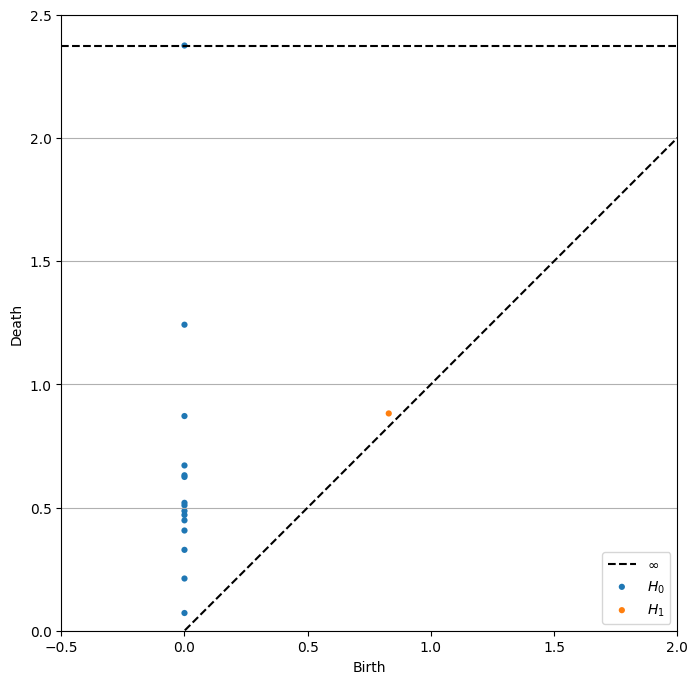

In [126]:
dgNOR = ripser(arrayPointsNOR)['dgms']
plt.grid(axis='y')
#plot_diagrams(dgNOR, show=True, xy_range=[-0.5,2,0,2.5]))
plot_diagrams(dgNOR, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

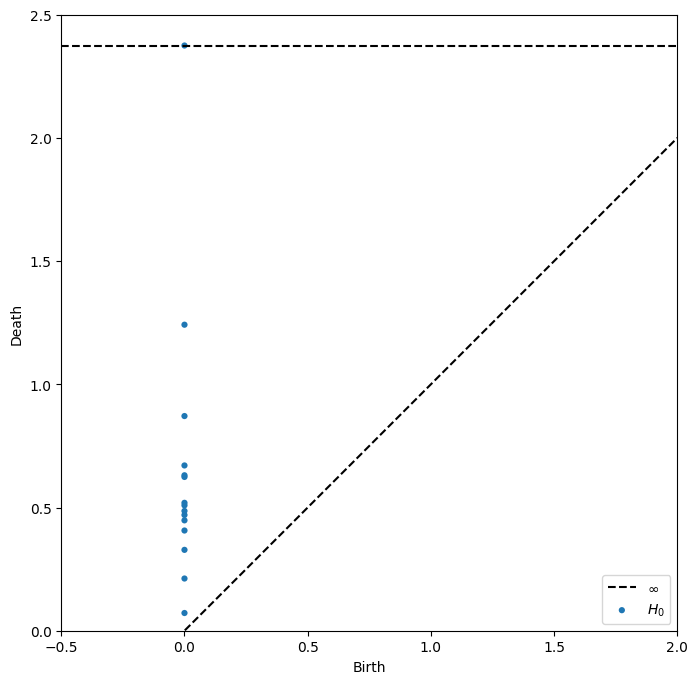

In [127]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgNOR_H0 = ripser(arrayPointsNOR)['dgms'][0]
plot_diagrams(dgNOR_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8,8]

#Policzenie odległość między parami diagramów

Odległości będą liczone tylko dla diagramów persystencji dotyczących dziur zerowymiarowych (składowych spójnych). 

## Wypisanie odległości między wszystkimi parami diagramów

###W formie słownej

In [138]:
print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgMCI_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgMCI_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgMCI_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgARS_H0 ')
print(persim.bottleneck(dgMCI_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgMCI_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgMCI_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgMCI_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgMCI_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgMCI_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgMCI_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgMCI_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgMCI_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgMCI_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgMCI_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgMCI_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgMCI_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgMCI_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgMCI_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgMCI_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgLIV_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgLIV_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgARS_H0 ')
print(persim.bottleneck(dgLIV_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgLIV_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgLIV_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgLIV_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgLIV_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgLIV_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgLIV_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgLIV_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgLIV_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgLIV_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgLIV_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgLIV_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgLIV_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgLIV_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgLIV_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgLIV_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgCHE_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgCHE_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgARS_H0 ')
print(persim.bottleneck(dgCHE_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgCHE_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgCHE_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgCHE_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgCHE_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgCHE_H0, dgWOL_H0))
print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgCHE_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgCHE_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgCHE_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgCHE_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgCHE_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgCHE_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgCHE_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgCHE_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgCHE_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgCHE_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgTOT_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgTOT_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgARS_H0 ')
print(persim.bottleneck(dgTOT_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgTOT_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgTOT_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgTOT_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgTOT_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgTOT_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgTOT_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgTOT_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgTOT_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgTOT_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgTOT_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgTOT_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgTOT_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgTOT_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgTOT_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgTOT_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgARS_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgARS_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgARS_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgARS_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgARS_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgARS_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgARS_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgARS_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgARS_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgARS_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgARS_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgARS_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgARS_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgARS_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgARS_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgARS_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgARS_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgARS_H0, dgNOR_H0))

print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgMUN_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgMUN_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgMUN_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgARS_H0 ')
print(persim.bottleneck(dgMUN_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgMUN_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgMUN_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgMUN_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgMUN_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgMUN_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgMUN_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgMUN_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgMUN_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgMUN_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgMUN_H0, dgEVE_H0))
print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgMUN_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgMUN_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgMUN_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgMUN_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgWHU_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgWHU_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgWHU_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgARS_H0 ')
print(persim.bottleneck(dgWHU_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgWHU_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgWHU_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgWHU_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgWHU_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgWHU_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgWHU_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgWHU_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgWHU_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgWHU_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgWHU_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgWHU_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgWHU_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgWHU_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgWHU_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgLEI_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgLEI_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgLEI_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgARS_H0 ')
print(persim.bottleneck(dgLEI_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgLEI_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgLEI_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgLEI_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgLEI_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgLEI_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgLEI_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgLEI_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgLEI_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgLEI_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgLEI_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgLEI_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgLEI_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgLEI_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgLEI_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgBHA_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgBHA_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgBHA_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgARS_H0 ')
print(persim.bottleneck(dgBHA_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgBHA_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgBHA_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgBHA_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgBHA_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgBHA_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgBHA_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgBHA_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgBHA_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgBHA_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgBHA_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgBHA_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgBHA_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgBHA_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgBHA_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgWOL_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgWOL_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgWOL_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgARS_H0 ')
print(persim.bottleneck(dgWOL_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgWOL_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgWOL_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgWOL_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgWOL_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgWOL_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgWOL_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgWOL_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgWOL_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgWOL_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgWOL_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgWOL_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgWOL_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgWOL_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgWOL_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgNEW_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgNEW_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgNEW_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgARS_H0 ')
print(persim.bottleneck(dgNEW_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgNEW_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgNEW_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgNEW_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgNEW_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgNEW_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgNEW_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgNEW_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgNEW_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgNEW_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgNEW_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgNEW_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgNEW_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgNEW_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgNEW_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgCRY_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgCRY_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgCRY_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgARS_H0 ')
print(persim.bottleneck(dgCRY_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgCRY_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgCRY_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgCRY_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgCRY_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgCRY_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgCRY_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgCRY_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgCRY_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgCRY_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgCRY_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgCRY_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgCRY_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgCRY_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgCRY_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgBRE_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgBRE_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgBRE_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgARS_H0 ')
print(persim.bottleneck(dgBRE_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgBRE_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgBRE_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgBRE_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgBRE_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgBRE_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgBRE_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgBRE_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgBRE_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgBRE_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgBRE_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgBRE_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgBRE_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgBRE_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgBRE_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgAVL_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgAVL_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgAVL_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgARS_H0 ')
print(persim.bottleneck(dgAVL_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgAVL_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgAVL_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgAVL_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgAVL_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgAVL_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgAVL_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgAVL_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgAVL_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgAVL_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgAVL_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgAVL_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgAVL_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgAVL_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgAVL_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgSOU_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgSOU_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgSOU_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgARS_H0 ')
print(persim.bottleneck(dgSOU_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgSOU_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgSOU_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgSOU_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgSOU_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgSOU_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgSOU_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgSOU_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgSOU_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgSOU_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgSOU_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgSOU_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgSOU_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgSOU_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgSOU_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgEVE_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgEVE_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgEVE_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgARS_H0 ')
print(persim.bottleneck(dgEVE_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgEVE_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgEVE_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgEVE_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgEVE_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgEVE_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgEVE_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgEVE_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgEVE_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgEVE_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgEVE_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgEVE_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgEVE_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgEVE_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgEVE_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgLEE_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgLEE_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgLEE_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgARS_H0 ')
print(persim.bottleneck(dgLEE_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgLEE_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgLEE_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgLEE_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgLEE_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgLEE_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgLEE_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgLEE_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgLEE_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgLEE_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgLEE_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgLEE_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgLEE_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgLEE_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgLEE_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgBRN_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgBRN_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgBRN_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgARS_H0 ')
print(persim.bottleneck(dgBRN_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgBRN_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgBRN_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgBRN_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgBRN_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgBRN_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgBRN_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgBRN_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgBRN_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgBRN_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgBRN_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgBRN_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgBRN_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgBRN_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgBRN_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgWAT_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgWAT_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgWAT_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgARS_H0 ')
print(persim.bottleneck(dgWAT_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgWAT_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgWAT_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgWAT_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgWAT_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgWAT_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgWAT_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgWAT_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgWAT_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgWAT_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgWAT_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgWAT_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgWAT_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgWAT_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgWAT_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgNOR_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgNOR_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgNOR_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgARS_H0 ')
print(persim.bottleneck(dgNOR_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgNOR_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgNOR_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgNOR_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgNOR_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgNOR_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgNOR_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgNOR_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgNOR_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgNOR_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgNOR_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgNOR_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgNOR_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgNOR_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgNOR_H0, dgWAT_H0))


#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLIV_H0 
0.23599299788475037
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgCHE_H0 
0.17063933610916138
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgTOT_H0 
0.5287261605262756
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgARS_H0 
0.12259358167648315
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgMUN_H0 
0.3885045647621155
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWHU_H0 
0.23550677299499512
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLEI_H0 
0.1179833710193634
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBHA_H0 
0.08044391870498657
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWOL_H0 
0.16102677583694458
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgNEW_H0 
0.226148784160614
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgCRY_H0 
0.15175408124923706
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBRE_H0 
0.18449586629867554
#skrótowe obliczenie 

###W formie tabeli

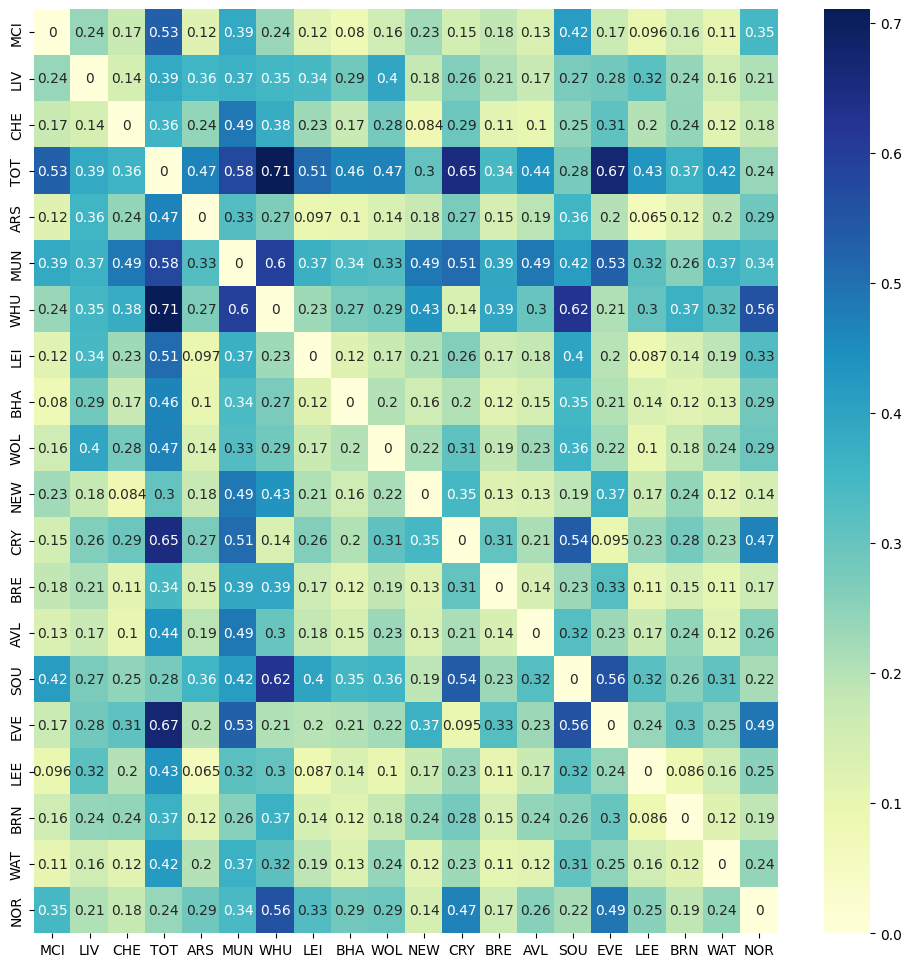

In [139]:
plt.figure(figsize = (12,12))

bottleneckDistances = [[0, persim.bottleneck(dgMCI_H0, dgLIV_H0), persim.bottleneck(dgMCI_H0, dgCHE_H0), persim.bottleneck(dgMCI_H0, dgTOT_H0), persim.bottleneck(dgMCI_H0, dgARS_H0), persim.bottleneck(dgMCI_H0, dgMUN_H0), persim.bottleneck(dgMCI_H0, dgWHU_H0), persim.bottleneck(dgMCI_H0, dgLEI_H0), persim.bottleneck(dgMCI_H0, dgBHA_H0), persim.bottleneck(dgMCI_H0, dgWOL_H0), persim.bottleneck(dgMCI_H0, dgNEW_H0), persim.bottleneck(dgMCI_H0, dgCRY_H0), persim.bottleneck(dgMCI_H0, dgBRE_H0), persim.bottleneck(dgMCI_H0, dgAVL_H0), persim.bottleneck(dgMCI_H0, dgSOU_H0), persim.bottleneck(dgMCI_H0, dgEVE_H0), persim.bottleneck(dgMCI_H0, dgLEE_H0), persim.bottleneck(dgMCI_H0, dgBRN_H0), persim.bottleneck(dgMCI_H0, dgWAT_H0), persim.bottleneck(dgMCI_H0, dgNOR_H0)],
        [persim.bottleneck(dgLIV_H0, dgMCI_H0), 0, persim.bottleneck(dgLIV_H0, dgCHE_H0), persim.bottleneck(dgLIV_H0, dgTOT_H0), persim.bottleneck(dgLIV_H0, dgARS_H0), persim.bottleneck(dgLIV_H0, dgMUN_H0), persim.bottleneck(dgLIV_H0, dgWHU_H0), persim.bottleneck(dgLIV_H0, dgLEI_H0), persim.bottleneck(dgLIV_H0, dgBHA_H0), persim.bottleneck(dgLIV_H0, dgWOL_H0), persim.bottleneck(dgLIV_H0, dgNEW_H0), persim.bottleneck(dgLIV_H0, dgCRY_H0), persim.bottleneck(dgLIV_H0, dgBRE_H0), persim.bottleneck(dgLIV_H0, dgAVL_H0), persim.bottleneck(dgLIV_H0, dgSOU_H0), persim.bottleneck(dgLIV_H0, dgEVE_H0), persim.bottleneck(dgLIV_H0, dgLEE_H0), persim.bottleneck(dgLIV_H0, dgBRN_H0), persim.bottleneck(dgLIV_H0, dgWAT_H0), persim.bottleneck(dgLIV_H0, dgNOR_H0)],
        [persim.bottleneck(dgCHE_H0, dgMCI_H0), persim.bottleneck(dgCHE_H0, dgLIV_H0), 0, persim.bottleneck(dgCHE_H0, dgTOT_H0), persim.bottleneck(dgCHE_H0, dgARS_H0), persim.bottleneck(dgCHE_H0, dgMUN_H0), persim.bottleneck(dgCHE_H0, dgWHU_H0), persim.bottleneck(dgCHE_H0, dgLEI_H0), persim.bottleneck(dgCHE_H0, dgBHA_H0), persim.bottleneck(dgCHE_H0, dgWOL_H0), persim.bottleneck(dgCHE_H0, dgNEW_H0), persim.bottleneck(dgCHE_H0, dgCRY_H0), persim.bottleneck(dgCHE_H0, dgBRE_H0), persim.bottleneck(dgCHE_H0, dgAVL_H0), persim.bottleneck(dgCHE_H0, dgSOU_H0), persim.bottleneck(dgCHE_H0, dgEVE_H0), persim.bottleneck(dgCHE_H0, dgLEE_H0), persim.bottleneck(dgCHE_H0, dgBRN_H0), persim.bottleneck(dgCHE_H0, dgWAT_H0), persim.bottleneck(dgCHE_H0, dgNOR_H0)],
        [persim.bottleneck(dgTOT_H0, dgMCI_H0), persim.bottleneck(dgTOT_H0, dgLIV_H0), persim.bottleneck(dgTOT_H0, dgCHE_H0), 0, persim.bottleneck(dgTOT_H0, dgARS_H0), persim.bottleneck(dgTOT_H0, dgMUN_H0), persim.bottleneck(dgTOT_H0, dgWHU_H0), persim.bottleneck(dgTOT_H0, dgLEI_H0), persim.bottleneck(dgTOT_H0, dgBHA_H0), persim.bottleneck(dgTOT_H0, dgWOL_H0), persim.bottleneck(dgTOT_H0, dgNEW_H0), persim.bottleneck(dgTOT_H0, dgCRY_H0), persim.bottleneck(dgTOT_H0, dgBRE_H0), persim.bottleneck(dgTOT_H0, dgAVL_H0), persim.bottleneck(dgTOT_H0, dgSOU_H0), persim.bottleneck(dgTOT_H0, dgEVE_H0), persim.bottleneck(dgTOT_H0, dgLEE_H0), persim.bottleneck(dgTOT_H0, dgBRN_H0), persim.bottleneck(dgTOT_H0, dgWAT_H0), persim.bottleneck(dgTOT_H0, dgNOR_H0)],
        [persim.bottleneck(dgARS_H0, dgMCI_H0), persim.bottleneck(dgARS_H0, dgLIV_H0), persim.bottleneck(dgARS_H0, dgCHE_H0), persim.bottleneck(dgARS_H0, dgTOT_H0), 0, persim.bottleneck(dgARS_H0, dgMUN_H0), persim.bottleneck(dgARS_H0, dgWHU_H0), persim.bottleneck(dgARS_H0, dgLEI_H0), persim.bottleneck(dgARS_H0, dgBHA_H0), persim.bottleneck(dgARS_H0, dgWOL_H0), persim.bottleneck(dgARS_H0, dgNEW_H0), persim.bottleneck(dgARS_H0, dgCRY_H0), persim.bottleneck(dgARS_H0, dgBRE_H0), persim.bottleneck(dgARS_H0, dgAVL_H0), persim.bottleneck(dgARS_H0, dgSOU_H0), persim.bottleneck(dgARS_H0, dgEVE_H0), persim.bottleneck(dgARS_H0, dgLEE_H0), persim.bottleneck(dgARS_H0, dgBRN_H0), persim.bottleneck(dgARS_H0, dgWAT_H0), persim.bottleneck(dgARS_H0, dgNOR_H0)],
        [persim.bottleneck(dgMUN_H0, dgMCI_H0), persim.bottleneck(dgMUN_H0, dgLIV_H0), persim.bottleneck(dgMUN_H0, dgCHE_H0), persim.bottleneck(dgMUN_H0, dgTOT_H0), persim.bottleneck(dgMUN_H0, dgARS_H0), 0, persim.bottleneck(dgMUN_H0, dgWHU_H0), persim.bottleneck(dgMUN_H0, dgLEI_H0), persim.bottleneck(dgMUN_H0, dgBHA_H0), persim.bottleneck(dgMUN_H0, dgWOL_H0), persim.bottleneck(dgMUN_H0, dgNEW_H0), persim.bottleneck(dgMUN_H0, dgCRY_H0), persim.bottleneck(dgMUN_H0, dgBRE_H0), persim.bottleneck(dgMUN_H0, dgAVL_H0), persim.bottleneck(dgMUN_H0, dgSOU_H0), persim.bottleneck(dgMUN_H0, dgEVE_H0), persim.bottleneck(dgMUN_H0, dgLEE_H0), persim.bottleneck(dgMUN_H0, dgBRN_H0), persim.bottleneck(dgMUN_H0, dgWAT_H0), persim.bottleneck(dgMUN_H0, dgNOR_H0)],
        [persim.bottleneck(dgWHU_H0, dgMCI_H0), persim.bottleneck(dgWHU_H0, dgLIV_H0), persim.bottleneck(dgWHU_H0, dgCHE_H0), persim.bottleneck(dgWHU_H0, dgTOT_H0), persim.bottleneck(dgWHU_H0, dgARS_H0), persim.bottleneck(dgWHU_H0, dgMUN_H0), 0, persim.bottleneck(dgWHU_H0, dgLEI_H0), persim.bottleneck(dgWHU_H0, dgBHA_H0), persim.bottleneck(dgWHU_H0, dgWOL_H0), persim.bottleneck(dgWHU_H0, dgNEW_H0), persim.bottleneck(dgWHU_H0, dgCRY_H0), persim.bottleneck(dgWHU_H0, dgBRE_H0), persim.bottleneck(dgWHU_H0, dgAVL_H0), persim.bottleneck(dgWHU_H0, dgSOU_H0), persim.bottleneck(dgWHU_H0, dgEVE_H0), persim.bottleneck(dgWHU_H0, dgLEE_H0), persim.bottleneck(dgWHU_H0, dgBRN_H0), persim.bottleneck(dgWHU_H0, dgWAT_H0), persim.bottleneck(dgWHU_H0, dgNOR_H0)],
        [persim.bottleneck(dgLEI_H0, dgMCI_H0), persim.bottleneck(dgLEI_H0, dgLIV_H0), persim.bottleneck(dgLEI_H0, dgCHE_H0), persim.bottleneck(dgLEI_H0, dgTOT_H0), persim.bottleneck(dgLEI_H0, dgARS_H0), persim.bottleneck(dgLEI_H0, dgMUN_H0), persim.bottleneck(dgLEI_H0, dgWHU_H0), 0, persim.bottleneck(dgLEI_H0, dgBHA_H0), persim.bottleneck(dgLEI_H0, dgWOL_H0), persim.bottleneck(dgLEI_H0, dgNEW_H0), persim.bottleneck(dgLEI_H0, dgCRY_H0), persim.bottleneck(dgLEI_H0, dgBRE_H0), persim.bottleneck(dgLEI_H0, dgAVL_H0), persim.bottleneck(dgLEI_H0, dgSOU_H0), persim.bottleneck(dgLEI_H0, dgEVE_H0), persim.bottleneck(dgLEI_H0, dgLEE_H0), persim.bottleneck(dgLEI_H0, dgBRN_H0), persim.bottleneck(dgLEI_H0, dgWAT_H0), persim.bottleneck(dgLEI_H0, dgNOR_H0)],
        [persim.bottleneck(dgBHA_H0, dgMCI_H0), persim.bottleneck(dgBHA_H0, dgLIV_H0), persim.bottleneck(dgBHA_H0, dgCHE_H0), persim.bottleneck(dgBHA_H0, dgTOT_H0), persim.bottleneck(dgBHA_H0, dgARS_H0), persim.bottleneck(dgBHA_H0, dgMUN_H0), persim.bottleneck(dgBHA_H0, dgWHU_H0), persim.bottleneck(dgBHA_H0, dgLEI_H0), 0, persim.bottleneck(dgBHA_H0, dgWOL_H0), persim.bottleneck(dgBHA_H0, dgNEW_H0), persim.bottleneck(dgBHA_H0, dgCRY_H0), persim.bottleneck(dgBHA_H0, dgBRE_H0), persim.bottleneck(dgBHA_H0, dgAVL_H0), persim.bottleneck(dgBHA_H0, dgSOU_H0), persim.bottleneck(dgBHA_H0, dgEVE_H0), persim.bottleneck(dgBHA_H0, dgLEE_H0), persim.bottleneck(dgBHA_H0, dgBRN_H0), persim.bottleneck(dgBHA_H0, dgWAT_H0), persim.bottleneck(dgBHA_H0, dgNOR_H0)],
        [persim.bottleneck(dgWOL_H0, dgMCI_H0), persim.bottleneck(dgWOL_H0, dgLIV_H0), persim.bottleneck(dgWOL_H0, dgCHE_H0), persim.bottleneck(dgWOL_H0, dgTOT_H0), persim.bottleneck(dgWOL_H0, dgARS_H0), persim.bottleneck(dgWOL_H0, dgMUN_H0), persim.bottleneck(dgWOL_H0, dgWHU_H0), persim.bottleneck(dgWOL_H0, dgLEI_H0), persim.bottleneck(dgWOL_H0, dgBHA_H0), 0, persim.bottleneck(dgWOL_H0, dgNEW_H0), persim.bottleneck(dgWOL_H0, dgCRY_H0), persim.bottleneck(dgWOL_H0, dgBRE_H0), persim.bottleneck(dgWOL_H0, dgAVL_H0), persim.bottleneck(dgWOL_H0, dgSOU_H0), persim.bottleneck(dgWOL_H0, dgEVE_H0), persim.bottleneck(dgWOL_H0, dgLEE_H0), persim.bottleneck(dgWOL_H0, dgBRN_H0), persim.bottleneck(dgWOL_H0, dgWAT_H0), persim.bottleneck(dgWOL_H0, dgNOR_H0)],
        [persim.bottleneck(dgNEW_H0, dgMCI_H0), persim.bottleneck(dgNEW_H0, dgLIV_H0), persim.bottleneck(dgNEW_H0, dgCHE_H0), persim.bottleneck(dgNEW_H0, dgTOT_H0), persim.bottleneck(dgNEW_H0, dgARS_H0), persim.bottleneck(dgNEW_H0, dgMUN_H0), persim.bottleneck(dgNEW_H0, dgWHU_H0), persim.bottleneck(dgNEW_H0, dgLEI_H0), persim.bottleneck(dgNEW_H0, dgBHA_H0), persim.bottleneck(dgNEW_H0, dgWOL_H0), 0, persim.bottleneck(dgNEW_H0, dgCRY_H0), persim.bottleneck(dgNEW_H0, dgBRE_H0), persim.bottleneck(dgNEW_H0, dgAVL_H0), persim.bottleneck(dgNEW_H0, dgSOU_H0), persim.bottleneck(dgNEW_H0, dgEVE_H0), persim.bottleneck(dgNEW_H0, dgLEE_H0), persim.bottleneck(dgNEW_H0, dgBRN_H0), persim.bottleneck(dgNEW_H0, dgWAT_H0), persim.bottleneck(dgNEW_H0, dgNOR_H0)],
        [persim.bottleneck(dgCRY_H0, dgMCI_H0), persim.bottleneck(dgCRY_H0, dgLIV_H0), persim.bottleneck(dgCRY_H0, dgCHE_H0), persim.bottleneck(dgCRY_H0, dgTOT_H0), persim.bottleneck(dgCRY_H0, dgARS_H0), persim.bottleneck(dgCRY_H0, dgMUN_H0), persim.bottleneck(dgCRY_H0, dgWHU_H0), persim.bottleneck(dgCRY_H0, dgLEI_H0), persim.bottleneck(dgCRY_H0, dgBHA_H0), persim.bottleneck(dgCRY_H0, dgWOL_H0), persim.bottleneck(dgCRY_H0, dgNEW_H0), 0, persim.bottleneck(dgCRY_H0, dgBRE_H0), persim.bottleneck(dgCRY_H0, dgAVL_H0), persim.bottleneck(dgCRY_H0, dgSOU_H0), persim.bottleneck(dgCRY_H0, dgEVE_H0), persim.bottleneck(dgCRY_H0, dgLEE_H0), persim.bottleneck(dgCRY_H0, dgBRN_H0), persim.bottleneck(dgCRY_H0, dgWAT_H0), persim.bottleneck(dgCRY_H0, dgNOR_H0)],
        [persim.bottleneck(dgBRE_H0, dgMCI_H0), persim.bottleneck(dgBRE_H0, dgLIV_H0), persim.bottleneck(dgBRE_H0, dgCHE_H0), persim.bottleneck(dgBRE_H0, dgTOT_H0), persim.bottleneck(dgBRE_H0, dgARS_H0), persim.bottleneck(dgBRE_H0, dgMUN_H0), persim.bottleneck(dgBRE_H0, dgWHU_H0), persim.bottleneck(dgBRE_H0, dgLEI_H0), persim.bottleneck(dgBRE_H0, dgBHA_H0), persim.bottleneck(dgBRE_H0, dgWOL_H0), persim.bottleneck(dgBRE_H0, dgNEW_H0), persim.bottleneck(dgBRE_H0, dgCRY_H0), 0, persim.bottleneck(dgBRE_H0, dgAVL_H0), persim.bottleneck(dgBRE_H0, dgSOU_H0), persim.bottleneck(dgBRE_H0, dgEVE_H0), persim.bottleneck(dgBRE_H0, dgLEE_H0), persim.bottleneck(dgBRE_H0, dgBRN_H0), persim.bottleneck(dgBRE_H0, dgWAT_H0), persim.bottleneck(dgBRE_H0, dgNOR_H0)],
        [persim.bottleneck(dgAVL_H0, dgMCI_H0), persim.bottleneck(dgAVL_H0, dgLIV_H0), persim.bottleneck(dgAVL_H0, dgCHE_H0), persim.bottleneck(dgAVL_H0, dgTOT_H0), persim.bottleneck(dgAVL_H0, dgARS_H0), persim.bottleneck(dgAVL_H0, dgMUN_H0), persim.bottleneck(dgAVL_H0, dgWHU_H0), persim.bottleneck(dgAVL_H0, dgLEI_H0), persim.bottleneck(dgAVL_H0, dgBHA_H0), persim.bottleneck(dgAVL_H0, dgWOL_H0), persim.bottleneck(dgAVL_H0, dgNEW_H0), persim.bottleneck(dgAVL_H0, dgCRY_H0), persim.bottleneck(dgAVL_H0, dgBRE_H0), 0, persim.bottleneck(dgAVL_H0, dgSOU_H0), persim.bottleneck(dgAVL_H0, dgEVE_H0), persim.bottleneck(dgAVL_H0, dgLEE_H0), persim.bottleneck(dgAVL_H0, dgBRN_H0), persim.bottleneck(dgAVL_H0, dgWAT_H0), persim.bottleneck(dgAVL_H0, dgNOR_H0)],
        [persim.bottleneck(dgSOU_H0, dgMCI_H0), persim.bottleneck(dgSOU_H0, dgLIV_H0), persim.bottleneck(dgSOU_H0, dgCHE_H0), persim.bottleneck(dgSOU_H0, dgTOT_H0), persim.bottleneck(dgSOU_H0, dgARS_H0), persim.bottleneck(dgSOU_H0, dgMUN_H0), persim.bottleneck(dgSOU_H0, dgWHU_H0), persim.bottleneck(dgSOU_H0, dgLEI_H0), persim.bottleneck(dgSOU_H0, dgBHA_H0), persim.bottleneck(dgSOU_H0, dgWOL_H0), persim.bottleneck(dgSOU_H0, dgNEW_H0), persim.bottleneck(dgSOU_H0, dgCRY_H0), persim.bottleneck(dgSOU_H0, dgBRE_H0), persim.bottleneck(dgSOU_H0, dgAVL_H0), 0, persim.bottleneck(dgSOU_H0, dgEVE_H0), persim.bottleneck(dgSOU_H0, dgLEE_H0), persim.bottleneck(dgSOU_H0, dgBRN_H0), persim.bottleneck(dgSOU_H0, dgWAT_H0), persim.bottleneck(dgSOU_H0, dgNOR_H0)],
        [persim.bottleneck(dgEVE_H0, dgMCI_H0), persim.bottleneck(dgEVE_H0, dgLIV_H0), persim.bottleneck(dgEVE_H0, dgCHE_H0), persim.bottleneck(dgEVE_H0, dgTOT_H0), persim.bottleneck(dgEVE_H0, dgARS_H0), persim.bottleneck(dgEVE_H0, dgMUN_H0), persim.bottleneck(dgEVE_H0, dgWHU_H0), persim.bottleneck(dgEVE_H0, dgLEI_H0), persim.bottleneck(dgEVE_H0, dgBHA_H0), persim.bottleneck(dgEVE_H0, dgWOL_H0), persim.bottleneck(dgEVE_H0, dgNEW_H0), persim.bottleneck(dgEVE_H0, dgCRY_H0), persim.bottleneck(dgEVE_H0, dgBRE_H0), persim.bottleneck(dgEVE_H0, dgAVL_H0), persim.bottleneck(dgEVE_H0, dgSOU_H0), 0, persim.bottleneck(dgEVE_H0, dgLEE_H0), persim.bottleneck(dgEVE_H0, dgBRN_H0), persim.bottleneck(dgEVE_H0, dgWAT_H0), persim.bottleneck(dgEVE_H0, dgNOR_H0)],
        [persim.bottleneck(dgLEE_H0, dgMCI_H0), persim.bottleneck(dgLEE_H0, dgLIV_H0), persim.bottleneck(dgLEE_H0, dgCHE_H0), persim.bottleneck(dgLEE_H0, dgTOT_H0), persim.bottleneck(dgLEE_H0, dgARS_H0), persim.bottleneck(dgLEE_H0, dgMUN_H0), persim.bottleneck(dgLEE_H0, dgWHU_H0), persim.bottleneck(dgLEE_H0, dgLEI_H0), persim.bottleneck(dgLEE_H0, dgBHA_H0), persim.bottleneck(dgLEE_H0, dgWOL_H0), persim.bottleneck(dgLEE_H0, dgNEW_H0), persim.bottleneck(dgLEE_H0, dgCRY_H0), persim.bottleneck(dgLEE_H0, dgBRE_H0), persim.bottleneck(dgLEE_H0, dgAVL_H0), persim.bottleneck(dgLEE_H0, dgSOU_H0), persim.bottleneck(dgLEE_H0, dgEVE_H0), 0, persim.bottleneck(dgLEE_H0, dgBRN_H0), persim.bottleneck(dgLEE_H0, dgWAT_H0), persim.bottleneck(dgLEE_H0, dgNOR_H0)],
        [persim.bottleneck(dgBRN_H0, dgMCI_H0), persim.bottleneck(dgBRN_H0, dgLIV_H0), persim.bottleneck(dgBRN_H0, dgCHE_H0), persim.bottleneck(dgBRN_H0, dgTOT_H0), persim.bottleneck(dgBRN_H0, dgARS_H0), persim.bottleneck(dgBRN_H0, dgMUN_H0), persim.bottleneck(dgBRN_H0, dgWHU_H0), persim.bottleneck(dgBRN_H0, dgLEI_H0), persim.bottleneck(dgBRN_H0, dgBHA_H0), persim.bottleneck(dgBRN_H0, dgWOL_H0), persim.bottleneck(dgBRN_H0, dgNEW_H0), persim.bottleneck(dgBRN_H0, dgCRY_H0), persim.bottleneck(dgBRN_H0, dgBRE_H0), persim.bottleneck(dgBRN_H0, dgAVL_H0), persim.bottleneck(dgBRN_H0, dgSOU_H0), persim.bottleneck(dgBRN_H0, dgEVE_H0), persim.bottleneck(dgBRN_H0, dgLEE_H0), 0, persim.bottleneck(dgBRN_H0, dgWAT_H0), persim.bottleneck(dgBRN_H0, dgNOR_H0)],
        [persim.bottleneck(dgWAT_H0, dgMCI_H0), persim.bottleneck(dgWAT_H0, dgLIV_H0), persim.bottleneck(dgWAT_H0, dgCHE_H0), persim.bottleneck(dgWAT_H0, dgTOT_H0), persim.bottleneck(dgWAT_H0, dgARS_H0), persim.bottleneck(dgWAT_H0, dgMUN_H0), persim.bottleneck(dgWAT_H0, dgWHU_H0), persim.bottleneck(dgWAT_H0, dgLEI_H0), persim.bottleneck(dgWAT_H0, dgBHA_H0), persim.bottleneck(dgWAT_H0, dgWOL_H0), persim.bottleneck(dgWAT_H0, dgNEW_H0), persim.bottleneck(dgWAT_H0, dgCRY_H0), persim.bottleneck(dgWAT_H0, dgBRE_H0), persim.bottleneck(dgWAT_H0, dgAVL_H0), persim.bottleneck(dgWAT_H0, dgSOU_H0), persim.bottleneck(dgWAT_H0, dgEVE_H0), persim.bottleneck(dgWAT_H0, dgLEE_H0), persim.bottleneck(dgWAT_H0, dgBRN_H0), 0, persim.bottleneck(dgWAT_H0, dgNOR_H0)],
        [persim.bottleneck(dgNOR_H0, dgMCI_H0), persim.bottleneck(dgNOR_H0, dgLIV_H0), persim.bottleneck(dgNOR_H0, dgCHE_H0), persim.bottleneck(dgNOR_H0, dgTOT_H0), persim.bottleneck(dgNOR_H0, dgARS_H0), persim.bottleneck(dgNOR_H0, dgMUN_H0), persim.bottleneck(dgNOR_H0, dgWHU_H0), persim.bottleneck(dgNOR_H0, dgLEI_H0), persim.bottleneck(dgNOR_H0, dgBHA_H0), persim.bottleneck(dgNOR_H0, dgWOL_H0), persim.bottleneck(dgNOR_H0, dgNEW_H0), persim.bottleneck(dgNOR_H0, dgCRY_H0), persim.bottleneck(dgNOR_H0, dgBRE_H0), persim.bottleneck(dgNOR_H0, dgAVL_H0), persim.bottleneck(dgNOR_H0, dgSOU_H0), persim.bottleneck(dgNOR_H0, dgEVE_H0), persim.bottleneck(dgNOR_H0, dgLEE_H0), persim.bottleneck(dgNOR_H0, dgBRN_H0), persim.bottleneck(dgNOR_H0, dgWAT_H0), 0],
        ]

teamLabels = ["MCI", "LIV", "CHE", "TOT", "ARS", "MUN", "WHU", "LEI", "BHA", "WOL", "NEW","CRY", "BRE", "AVL", "SOU", "EVE", "LEE", "BRN", "WAT", "NOR"]

ax = sns.heatmap(bottleneckDistances, xticklabels=teamLabels, yticklabels=teamLabels, annot=True, cmap="YlGnBu")
plt.show()

#Stworzenie dendrogramów 

In [140]:
distanceMartix = np.array(bottleneckDistances)
distanceMartix

array([[0.        , 0.235993  , 0.17063934, 0.52872616, 0.12259358,
        0.38850456, 0.23550677, 0.11798337, 0.08044392, 0.16102678,
        0.22614878, 0.15175408, 0.18449587, 0.13433242, 0.4170137 ,
        0.16833091, 0.0962162 , 0.16134614, 0.10776132, 0.34967476],
       [0.235993  , 0.        , 0.14473593, 0.385975  , 0.35739326,
        0.36906326, 0.35044074, 0.34485584, 0.28803778, 0.39582646,
        0.17981237, 0.26404381, 0.2105453 , 0.17431098, 0.27426255,
        0.28346747, 0.31758833, 0.23934942, 0.16013816, 0.2069236 ],
       [0.17063934, 0.14473593, 0.        , 0.35808682, 0.24207103,
        0.48730457, 0.37832892, 0.22953361, 0.17271554, 0.28050423,
        0.08433735, 0.29193199, 0.1118657 , 0.10435596, 0.24637437,
        0.31135565, 0.2022661 , 0.24411607, 0.1200552 , 0.17903543],
       [0.52872616, 0.385975  , 0.35808682, 0.        , 0.46841705,
        0.5779503 , 0.71050543, 0.51007015, 0.46414119, 0.47080588,
        0.30257738, 0.65001881, 0.34423029, 0

In [141]:
teamRankingLabels = ["MCI-1", "LIV-2", "CHE-3", "TOT-4", "ARS-5", "MUN-6", "WHU-7", "LEI-8", "BHA-9", "WOL-10", "NEW-11", "CRY-12", "BRE-13", "AVL-14", "SOU-15", "EVE-16", "LEE-17", "BRN-18", "WAT-19", "NOR-20"]


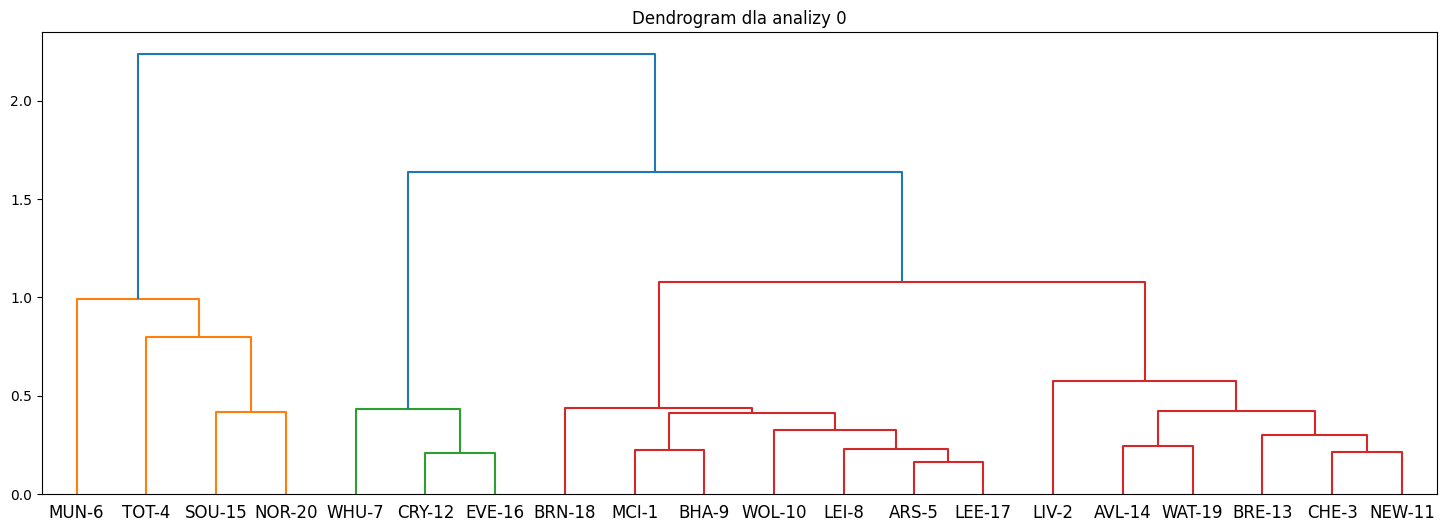

In [142]:
plt.figure(figsize=(18, 6))
plt.title("Dendrogram dla analizy 0")
clusters = shc.linkage(distanceMartix, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters, labels=teamRankingLabels)
plt.show()